<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_600-650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [427]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [428]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [04:40:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Invariant Violation
RDKit ERROR: no eligible neighbors for chiral center
RDKit ERROR: Violation occurred on line 238 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/FileParsers/MolFileStereochem.cpp
RDKit ERROR: Failed Expression: nbrScores.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [04:40:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Invariant Violation
RDKit ERROR: no eligible neighbors for chiral center
RDKit ERROR: Violation occurred on line 238 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/FileParsers/MolFileStereochem.cpp
RDKit ERROR: Failed Expression: nbrScores.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [04:42:36] non-ring atom 1 marked aromatic


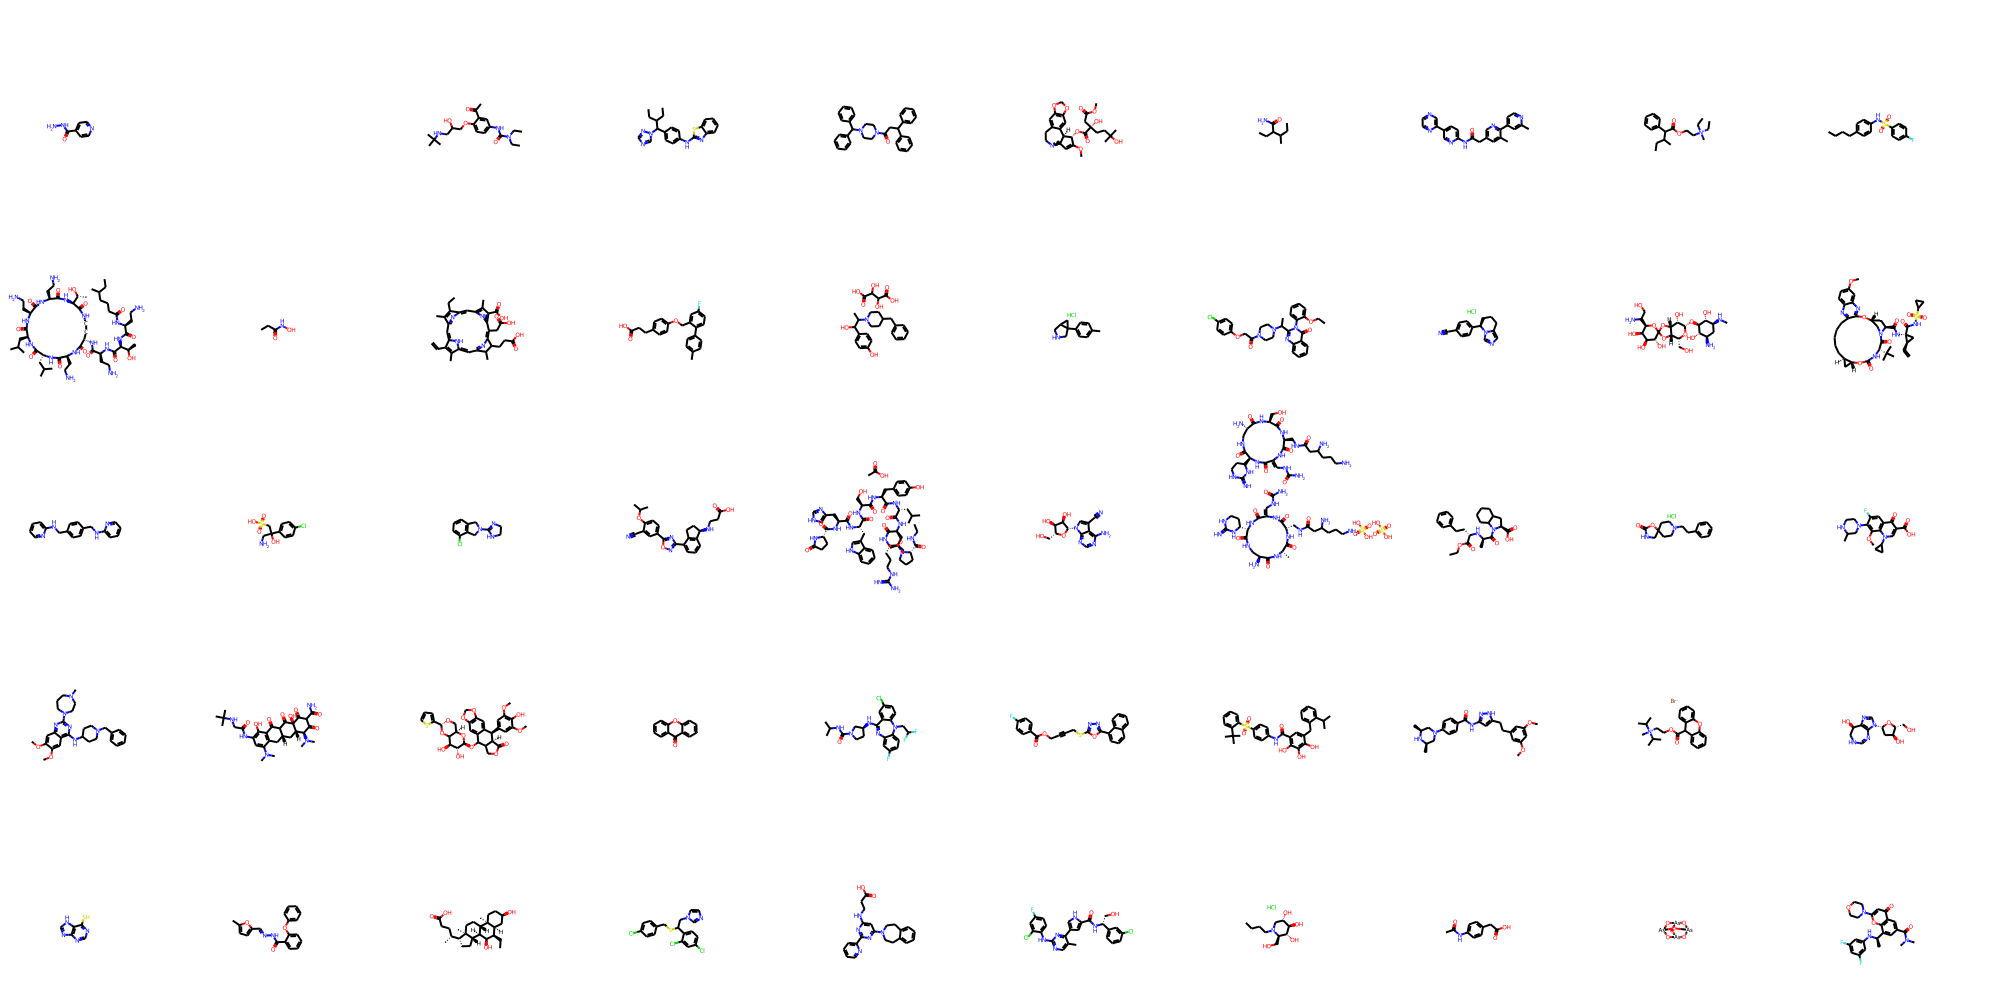

In [429]:
smiles_list = [
'NNC(=O)c1ccncc1',
'No Data',
'CCN(CC)C(=O)Nc1ccc(OCC(O)CNC(C)(C)C)c(C(C)=O)c1',
'CCC(CC)C(c1ccc(Nc2nc3ccccc3s2)cc1)n1cncn1',
'O=C(CC(c1ccccc1)c1ccccc1)N1CCN(C(c2ccccc2)c2ccccc2)CC1',
'COC(=O)C[C@@](O)(CCC(C)(C)O)C(=O)O[C@@H]1C(OC)=C[C@]23CCCN2CCc2cc4c(cc2[C@@H]13)OCO4',
'CCC(C)C(CC)C(N)=O',
'Cc1cc(-c2ncc(CC(=O)Nc3ccc(-c4cnccn4)cn3)cc2C)ccn1',
'CCC(C)C(C(=O)OCC[N+](C)(CC)CC)c1ccccc1',
'CCCCc1ccc(NS(=O)(=O)c2ccc(F)cc2)cc1',
'CCC(C)CCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C@@H](CCN)C(=O)N[C@H]1CCNC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCN)NC(=O)[C@H](CCN)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](CCN)NC1=O)[C@@H](C)O',
'CCC(=O)NO',
'C=Cc1c(C)c2cc3nc(c(CC(=O)O)c4[nH]c(cc5nc(cc1[nH]2)C(C)=C5CC)c(C)c4C(=O)O)C(CCC(=O)O)C3C',
'Cc1ccc(-c2ccc(F)cc2COc2ccc(CCC(=O)O)cc2)cc1',
'CC(C(O)c1ccc(O)cc1)N1CCC(Cc2ccccc2)CC1.O=C(O)C(O)C(O)C(=O)O',
'Cc1ccc(C23CNCC2C3)cc1.Cl',
'CCOc1ccccc1-n1c(C(C)N2CCN(C(=O)COc3ccc(Cl)cc3)CC2)nc2ccccc2c1=O',
'Cl.N#Cc1ccc([C@H]2CCCc3cncn32)cc1',
'CN[C@H]1C[C@@H](N)[C@H](O)[C@@H](O[C@@H]2O[C@H](CO)[C@@H]3OC4(O[C@@H]3[C@@H]2O)O[C@H](C(N)CO)[C@H](O)[C@H](O)[C@H]4O)[C@@H]1O',
'C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[C@H](C(C)(C)C)NC(=O)O[C@@H]1C[C@H]1CCCCCc1nc3ccc(OC)cc3nc1O2)C(=O)NS(=O)(=O)C1CC1',
'c1ccc(NCc2ccc(CNc3ccccn3)cc2)nc1',
'NCC(O)(CS(=O)(=O)O)c1ccc(Cl)cc1',
'Clc1cccc2c1CN(C1=NCCN1)C2',
'CC(C)Oc1ccc(-c2nc(-c3cccc4c3CC[C@H]4NCCC(=O)O)no2)cc1C#N',
'CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@H](CO)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H]1CCC(=O)N1',
'N#Cc1cn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c2ncnc(N)c12',
'C[C@@H]1NC(=O)[C@@H](N)CNC(=O)[C@H](C2CCNC(=N)N2)NC(=O)/C(=C/NC(N)=O)NC(=O)[C@H](CNC(=O)CC(N)CCCN)NC1=O.N=C1NCCC([C@@H]2NC(=O)/C(=C/NC(N)=O)NC(=O)[C@H](CNC(=O)CC(N)CCCN)NC(=O)[C@H](CO)NC(=O)[C@@H](N)CNC2=O)N1.O=S(=O)(O)O.O=S(=O)(O)O',
'CCOC(=O)[C@H](CCc1ccccc1)N[C@H](C)C(=O)N1C2CCCCC2C[C@H]1C(=O)O',
'Cl.O=C1NCC2(CCN(CCc3ccccc3)CC2)O1',
'COc1c(N2CCNC(C)C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC3)c12',
'COc1cc2nc(N3CCCN(C)CC3)nc(NC3CCN(Cc4ccccc4)CC3)c2cc1OC',
'CN(C)c1cc(NC(=O)CNC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(=O)C(C(N)=O)C(=O)[C@@]3(O)C(=O)C1C2=O',
'COc1cc([C@@H]2c3cc4c(cc3C(O[C@@H]3O[C@@H]5CO[C@@H](c6cccs6)OC5[C@H](O)[C@H]3O)C3COC(=O)[C@@H]32)OCO4)cc(OC)c1O',
'O=c1c2ccccc2oc2ccccc12',
'CC(C)NC(=O)N1CC[C@H](NC2=Nc3cc(F)ccc3N(CC(F)F)c3ccc(Cl)cc32)C1',
'O=C(OCC#CCSc1nnc(-c2cccc3ccccc23)o1)c1ccc(F)cc1',
'CC(C)c1ccccc1Cc1cc(C(=O)Nc2ccc(S(=O)(=O)c3ccccc3C(C)(C)C)cc2)c(O)c(O)c1O',
'COc1cc(CCc2cc(NC(=O)c3ccc(N4C[C@H](C)N[C@H](C)C4)cc3)n[nH]2)cc(OC)c1',
'CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)C.[Br-]',
'OC[C@H]1O[C@@H](n2cnc3c2N=CNC[C@H]3O)C[C@@H]1O',
'Sc1ncnc2nc[nH]c12',
'Cc1ccc(/C=N/NC(=O)c2ccccc2Oc2ccccc2)o1',
'CC[C@@H]1[C@@H]2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@@]3(C)[C@@H](CC[C@@H]3[C@H](C)CCC(=O)O)[C@@H]2[C@@H]1O',
'Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1',
'O=C(O)CCNc1cc(N2CCc3ccccc3CC2)nc(-c2ccccn2)n1',
'Cc1cnc(Nc2ccc(F)cc2Cl)nc1-c1c[nH]c(C(=O)N[C@H](CO)c2cccc(Cl)c2)c1',
'CCCCN1C[C@H](O)[C@@H](O)[C@H](O)[C@H]1CO.Cl',
'CC(=O)Nc1ccc(CC(=O)O)cc1',
'O1[As]2O[As]3O[As]1O[As](O2)O3',
'C[C@@H](Nc1cc(F)cc(F)c1)c1cc(C(=O)N(C)C)cc2c(=O)cc(N3CCOCC3)oc12',
               

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



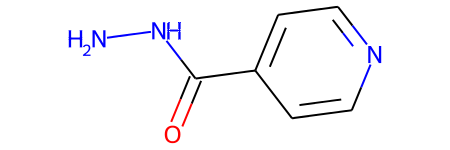

In [430]:
M1 = mol_list [0]
M1

In [431]:
M2 = mol_list [1]
M2

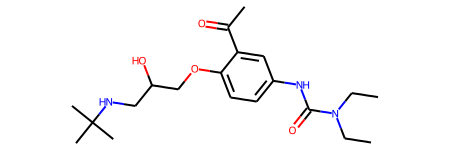

In [432]:
M3 = mol_list [2]
M3

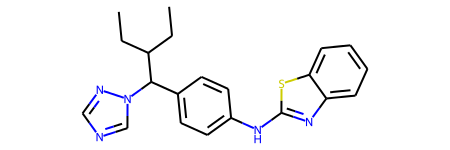

In [433]:
M4 = mol_list [3]
M4

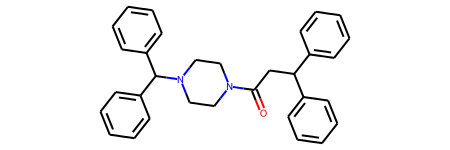

In [434]:
M5 = mol_list [4]
M5

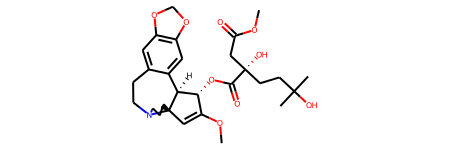

In [435]:
M6 = mol_list [5]
M6

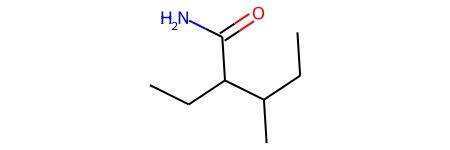

In [436]:
M7 = mol_list [6]
M7

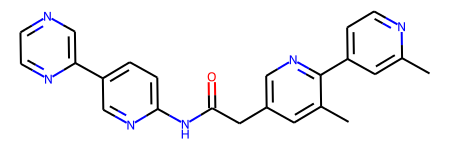

In [437]:
M8 = mol_list [7]
M8

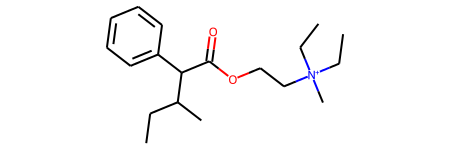

In [438]:
M9 = mol_list [8]
M9

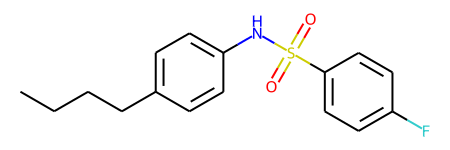

In [439]:
M10= mol_list [9]
M10

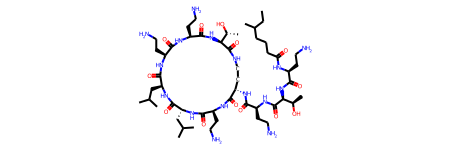

In [440]:
M11= mol_list [10]
M11

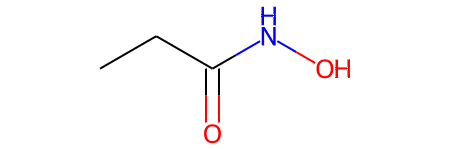

In [441]:
M12= mol_list [11]
M12

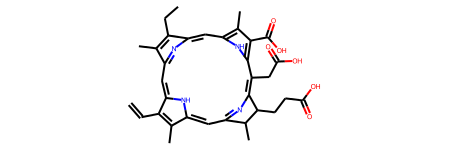

In [442]:
M13= mol_list [12]
M13

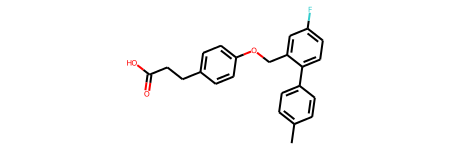

In [443]:
M14= mol_list [13]
M14

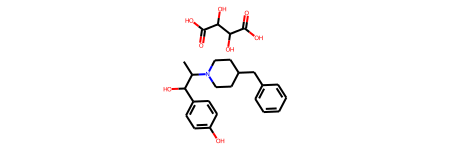

In [444]:
M15= mol_list [14]
M15

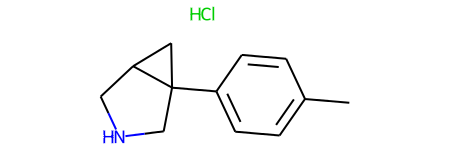

In [445]:
M16= mol_list [15]
M16

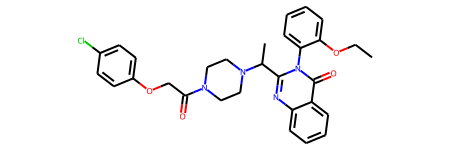

In [446]:
M17= mol_list [16]
M17

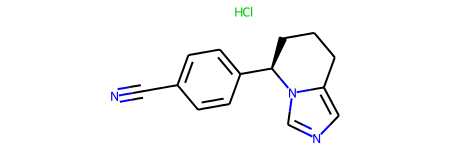

In [447]:
M18= mol_list [17]
M18

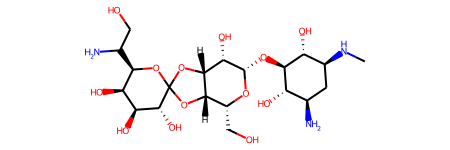

In [448]:
M19= mol_list [18]
M19

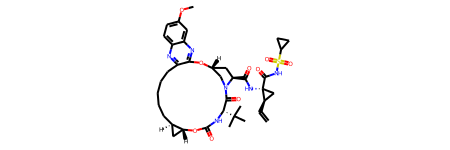

In [449]:
M20= mol_list [19]
M20

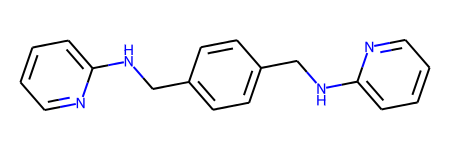

In [450]:
M21= mol_list [20]
M21

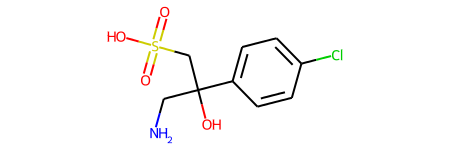

In [451]:
M22= mol_list [21]
M22

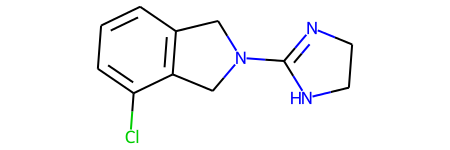

In [452]:
M23= mol_list [22]
M23

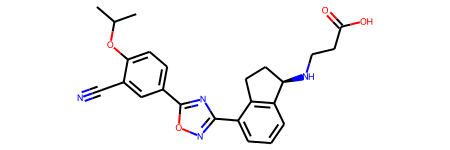

In [453]:
M24= mol_list [23]
M24

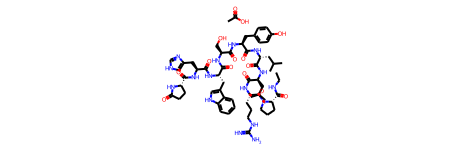

In [454]:
M25= mol_list [24]
M25

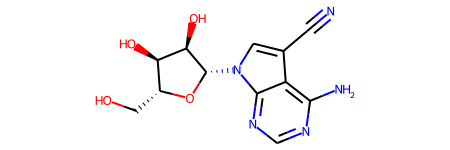

In [455]:
M26= mol_list [25]
M26

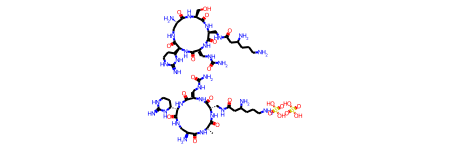

In [456]:
M27= mol_list [26]
M27

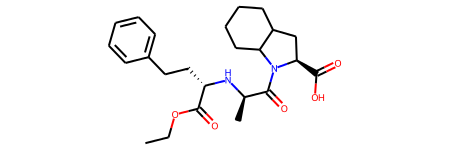

In [457]:
M28= mol_list [27]
M28

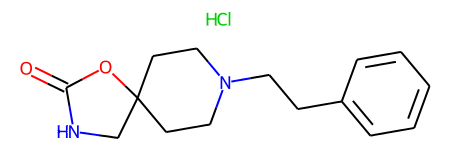

In [458]:
M29= mol_list [28]
M29

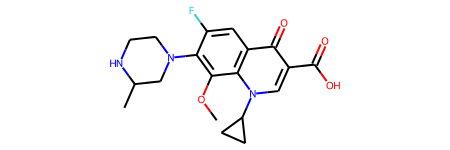

In [459]:
M30= mol_list [29]
M30

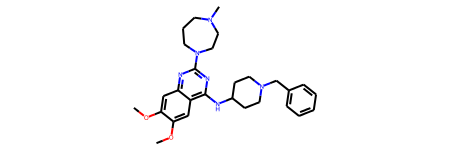

In [460]:
M31= mol_list [30]
M31

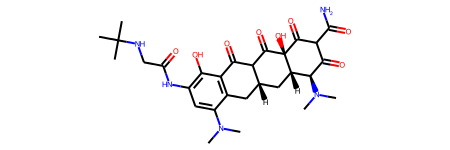

In [461]:
M32= mol_list [31]
M32

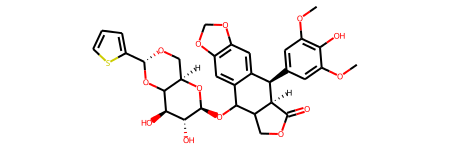

In [462]:
M33= mol_list [32]
M33

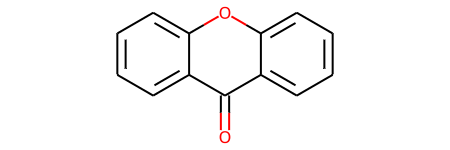

In [463]:
M34= mol_list [33]
M34

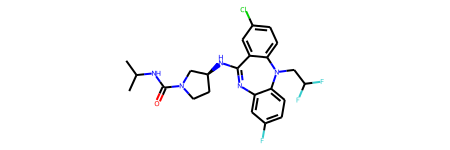

In [464]:
M35= mol_list [34]
M35

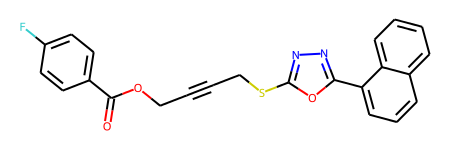

In [465]:
M36= mol_list [35]
M36

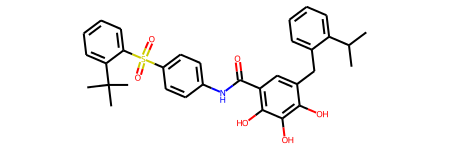

In [466]:
M37= mol_list [36]
M37

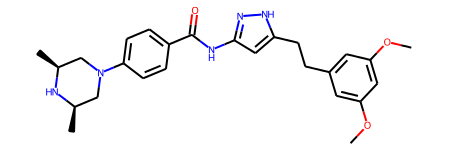

In [467]:
M38= mol_list [37]
M38


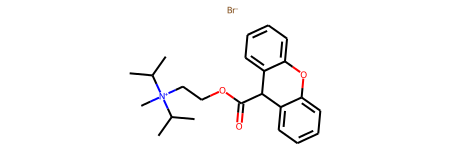

In [468]:
M39= mol_list [38]
M39

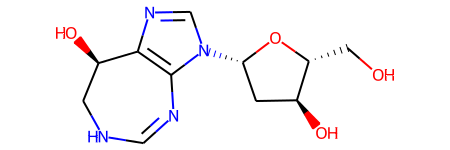

In [469]:
M40= mol_list [39]
M40

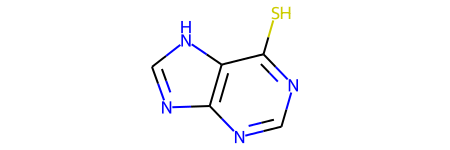

In [470]:
M41= mol_list [40]
M41

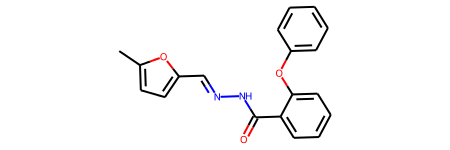

In [471]:
M42= mol_list [41]
M42

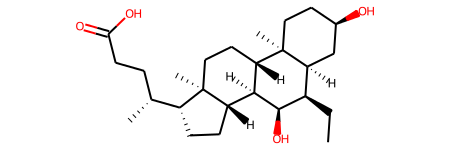

In [472]:
M43= mol_list [42]
M43

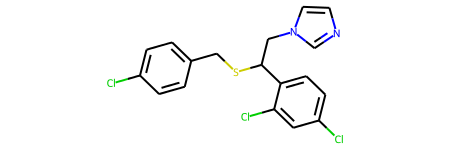

In [473]:
M44= mol_list [43]
M44

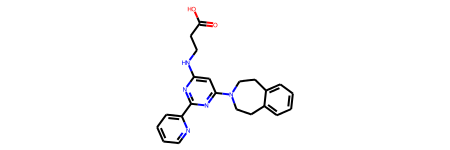

In [474]:
M45= mol_list [44]
M45

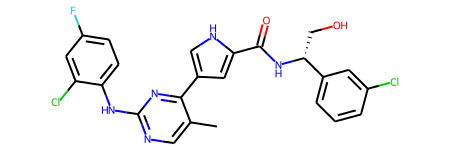

In [475]:
M46= mol_list [45]
M46

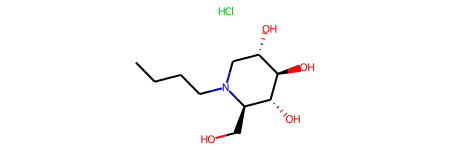

In [476]:
M47= mol_list [46]
M47

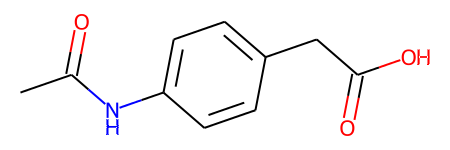

In [477]:
M48= mol_list [47]
M48

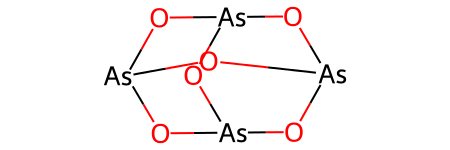

In [478]:
M49= mol_list [48]
M49

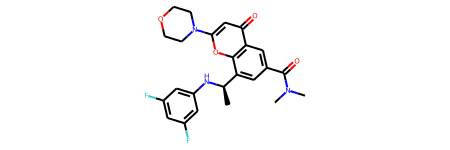

In [479]:
M50= mol_list [49]
M50

In [480]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[80,
 128,
 147,
 184,
 356,
 361,
 378,
 383,
 486,
 497,
 579,
 641,
 650,
 677,
 726,
 770,
 807,
 842,
 849,
 893,
 963]

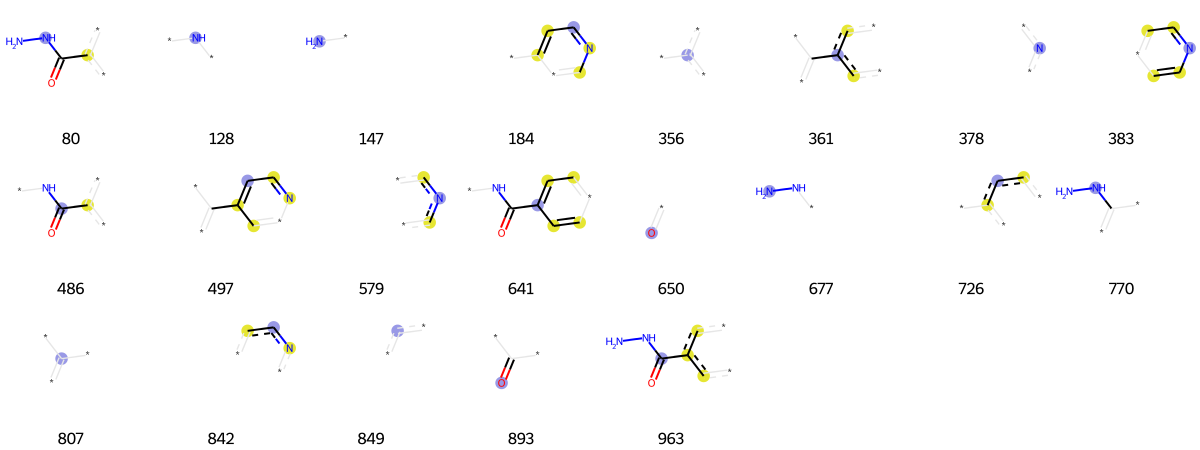

In [481]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [482]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 60,
 80,
 89,
 94,
 105,
 114,
 118,
 128,
 184,
 191,
 193,
 204,
 227,
 294,
 329,
 356,
 392,
 403,
 428,
 430,
 462,
 499,
 500,
 554,
 603,
 606,
 650,
 658,
 695,
 726,
 792,
 796,
 807,
 843,
 849,
 875,
 881,
 893,
 932,
 946,
 954,
 967,
 978,
 1008,
 1014,
 1017]

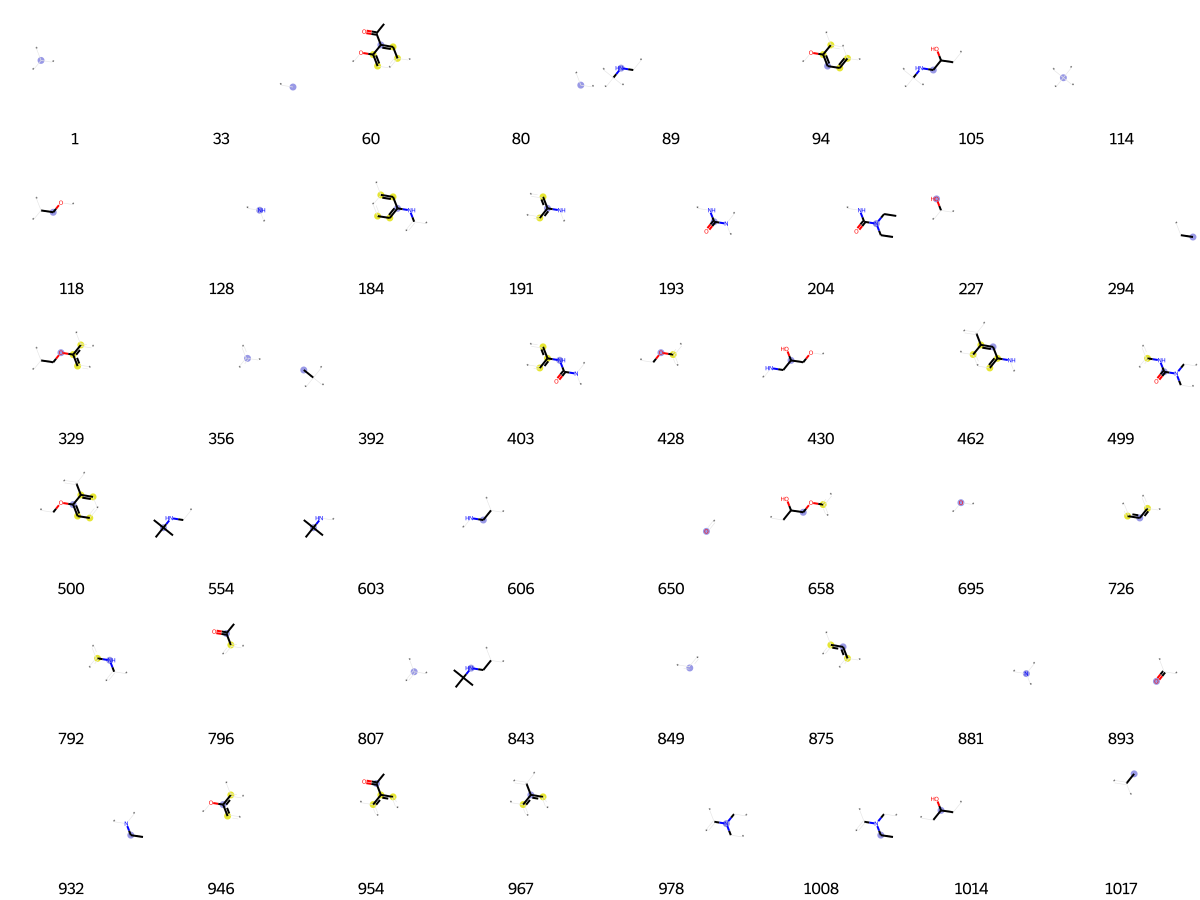

In [483]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [484]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 33,
 34,
 43,
 64,
 73,
 80,
 128,
 140,
 156,
 162,
 175,
 179,
 191,
 206,
 289,
 294,
 308,
 341,
 356,
 360,
 378,
 385,
 413,
 461,
 489,
 491,
 500,
 520,
 548,
 557,
 564,
 579,
 651,
 664,
 675,
 716,
 722,
 726,
 727,
 800,
 829,
 831,
 843,
 849,
 885,
 932,
 935,
 980]

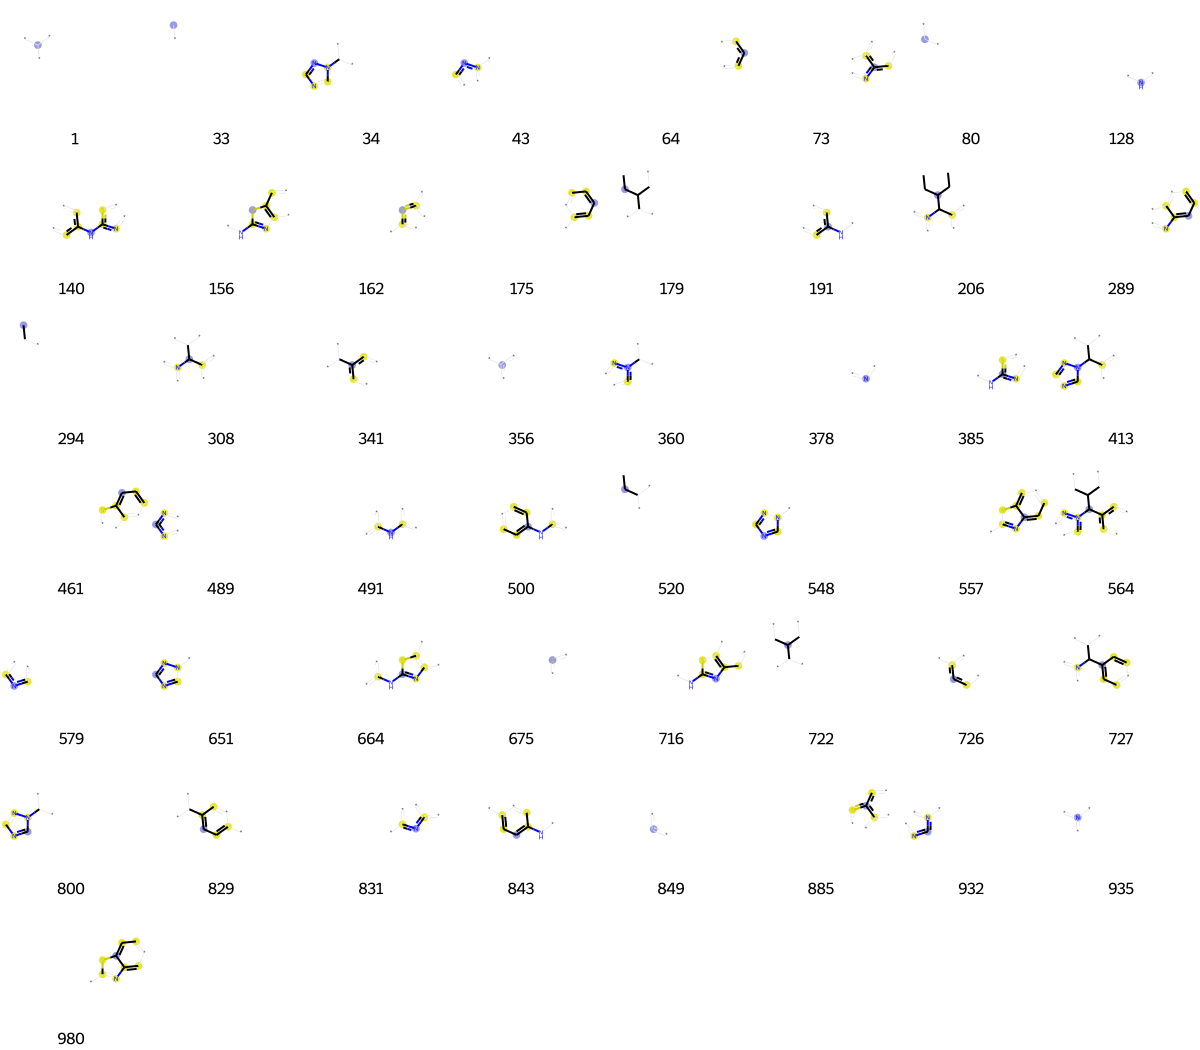

In [485]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [486]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 15,
 64,
 75,
 80,
 175,
 241,
 266,
 297,
 340,
 341,
 356,
 389,
 435,
 456,
 461,
 557,
 565,
 603,
 650,
 726,
 760,
 807,
 815,
 849,
 893,
 919,
 926,
 935,
 985,
 1009]

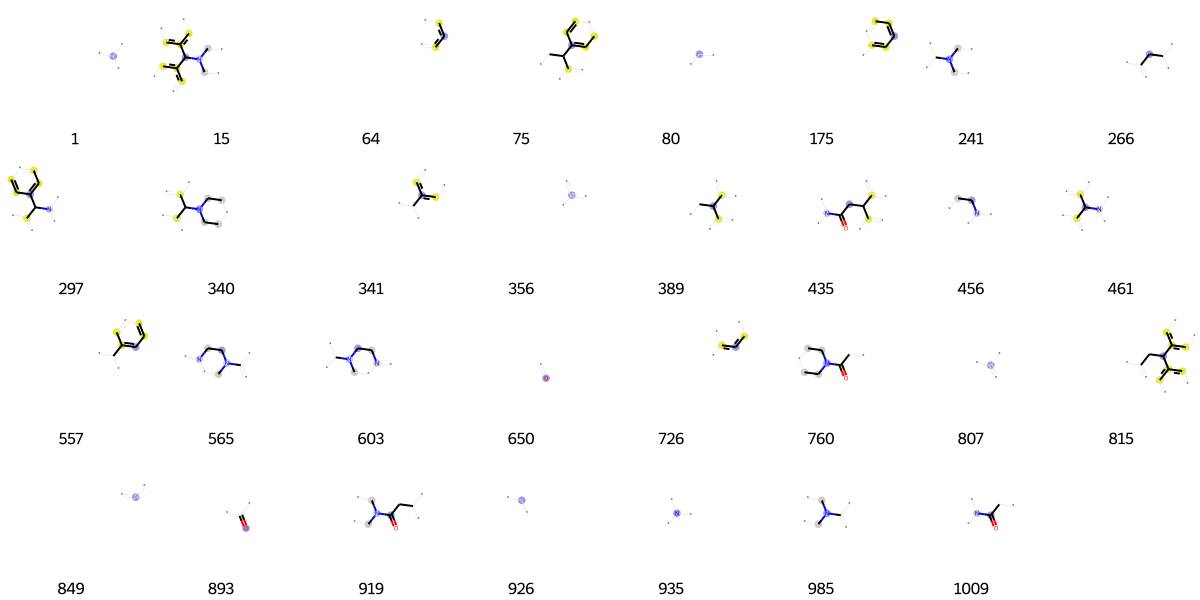

In [487]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [488]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[3,
 4,
 7,
 33,
 36,
 37,
 46,
 52,
 68,
 70,
 80,
 102,
 103,
 106,
 108,
 113,
 114,
 128,
 138,
 157,
 195,
 212,
 243,
 280,
 284,
 307,
 325,
 354,
 356,
 362,
 368,
 379,
 388,
 392,
 441,
 456,
 492,
 512,
 552,
 636,
 644,
 650,
 656,
 695,
 711,
 714,
 738,
 776,
 802,
 807,
 839,
 841,
 845,
 849,
 855,
 864,
 875,
 881,
 884,
 893,
 904,
 926,
 935,
 952,
 982,
 1007,
 1019]

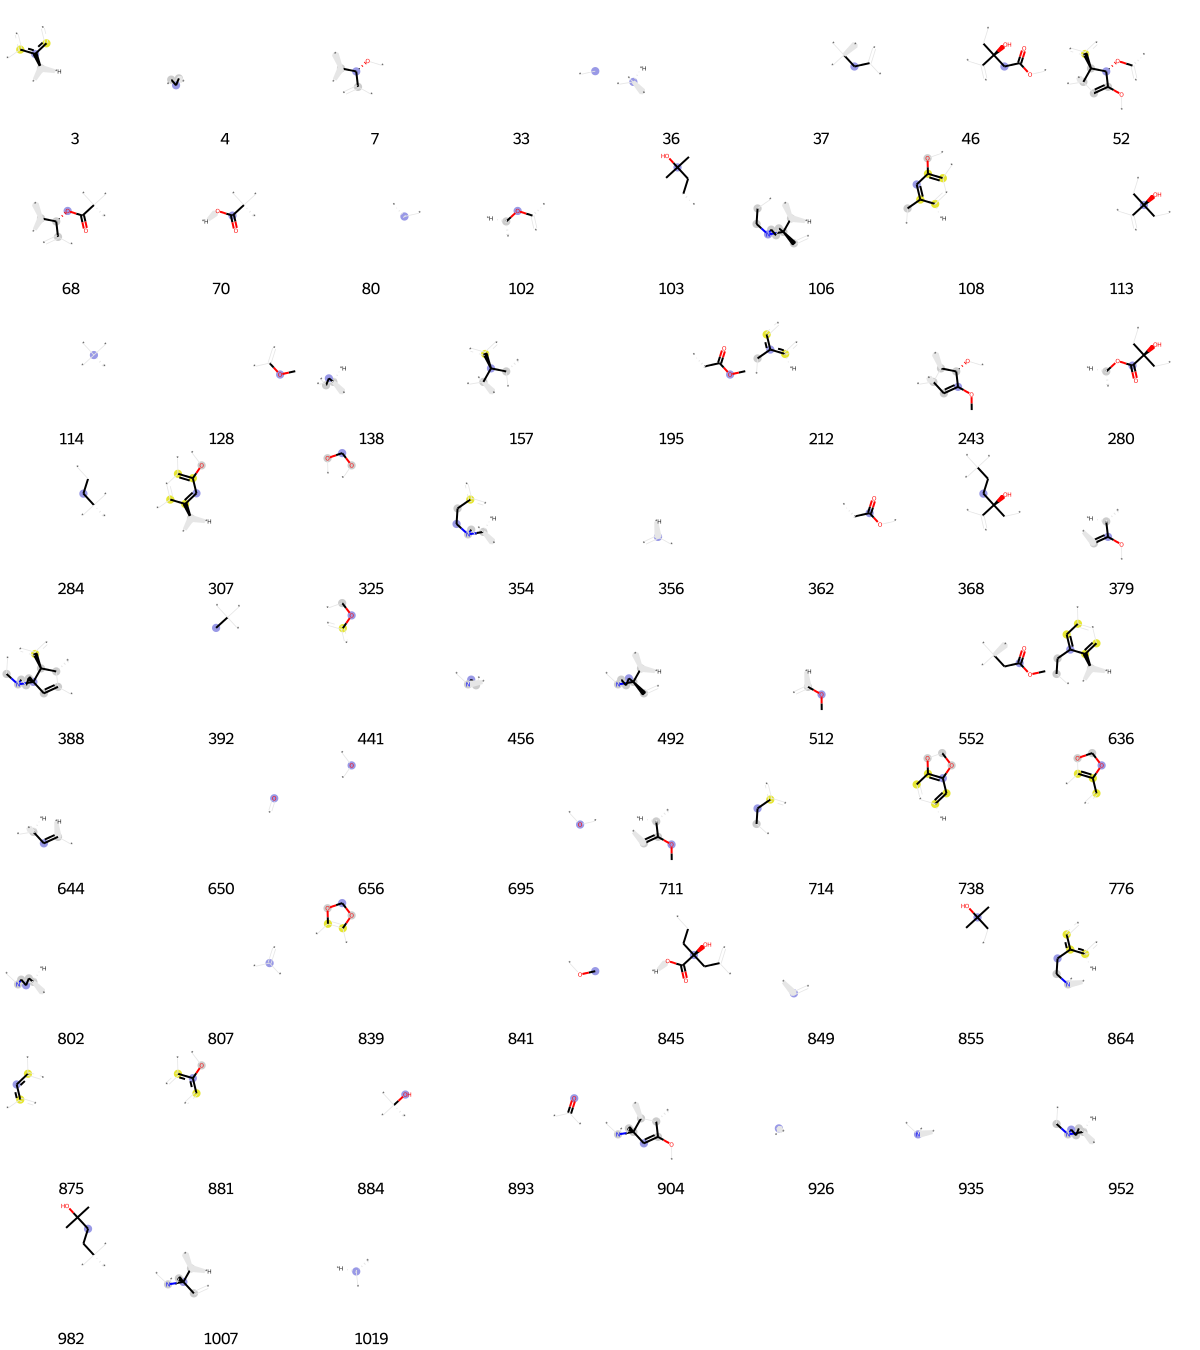

In [489]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [490]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 33,
 80,
 140,
 147,
 188,
 236,
 283,
 294,
 501,
 507,
 520,
 625,
 650,
 695,
 761,
 807,
 893,
 969]

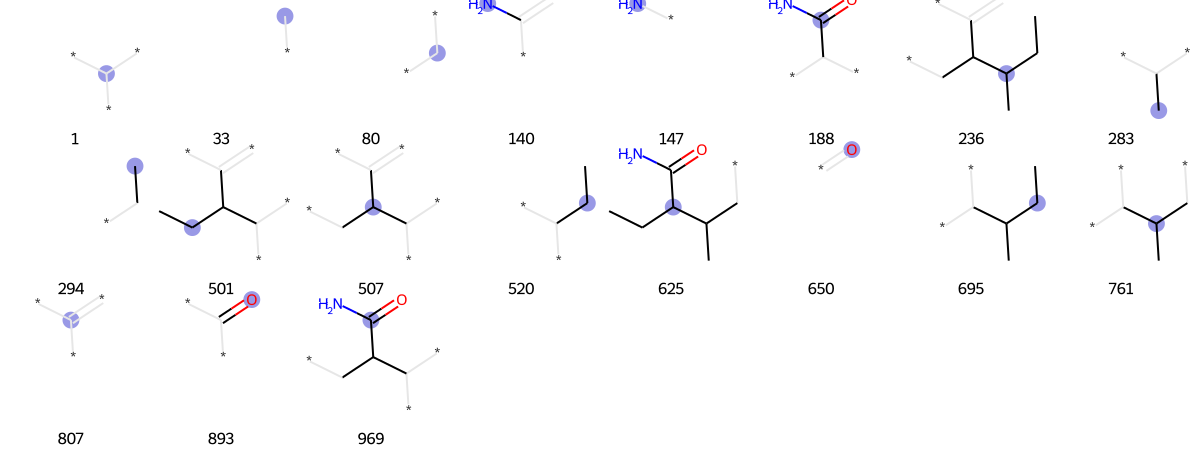

In [491]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [492]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[32,
 33,
 36,
 41,
 47,
 75,
 80,
 101,
 112,
 128,
 136,
 146,
 155,
 168,
 247,
 288,
 323,
 325,
 336,
 356,
 367,
 378,
 382,
 428,
 463,
 511,
 552,
 562,
 579,
 650,
 698,
 707,
 711,
 726,
 730,
 732,
 787,
 792,
 807,
 842,
 849,
 859,
 875,
 885,
 889,
 893,
 896,
 961,
 967,
 980]

In [493]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 13,
 33,
 64,
 80,
 116,
 147,
 175,
 283,
 293,
 294,
 341,
 356,
 389,
 414,
 428,
 478,
 491,
 520,
 557,
 628,
 644,
 650,
 695,
 726,
 761,
 807,
 849,
 893,
 909,
 913,
 954,
 962,
 976,
 1004,
 1017]

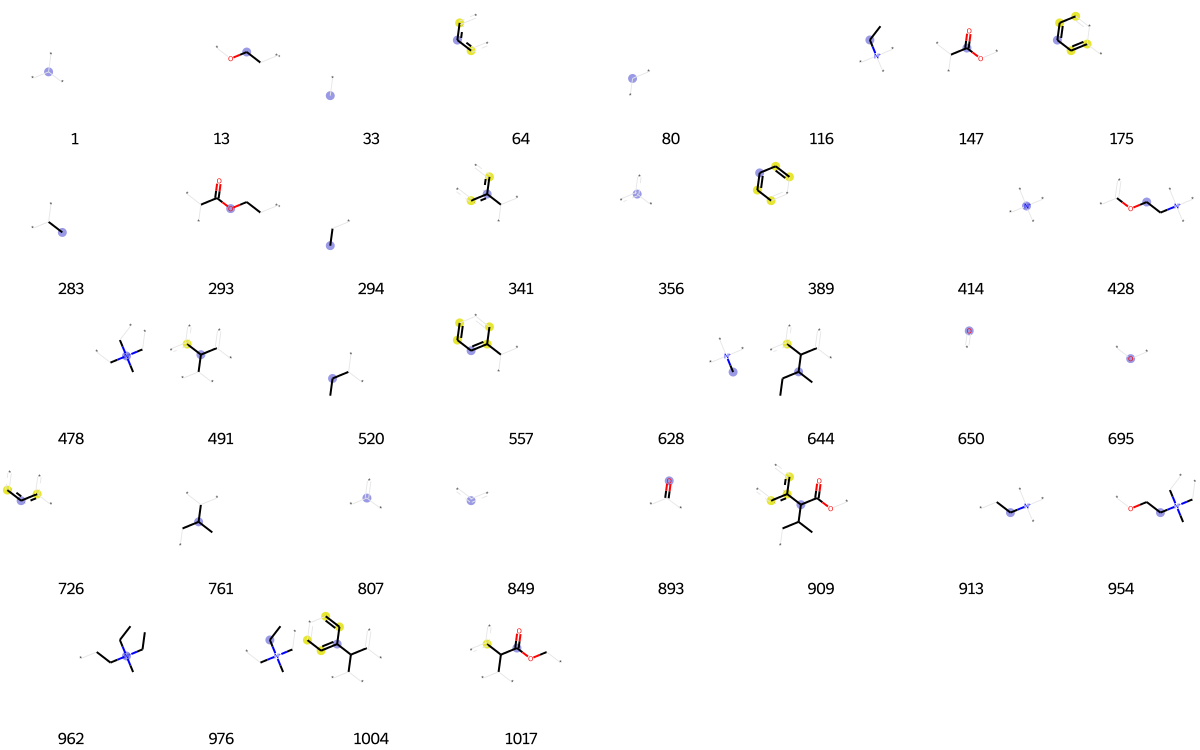

In [494]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [495]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 21,
 33,
 80,
 90,
 128,
 191,
 219,
 246,
 294,
 310,
 319,
 350,
 356,
 386,
 452,
 502,
 591,
 646,
 650,
 661,
 699,
 715,
 726,
 730,
 743,
 794,
 843,
 849,
 883,
 887,
 904,
 975,
 978]

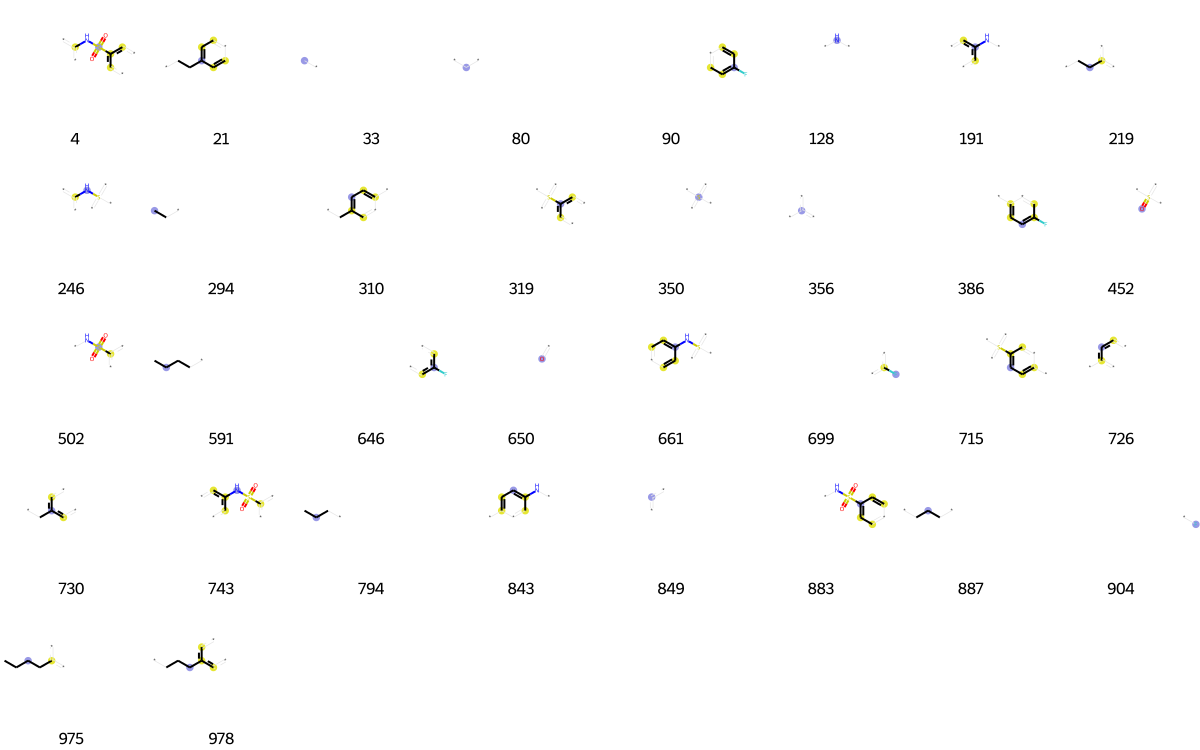

In [496]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [497]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 10,
 30,
 33,
 41,
 80,
 86,
 90,
 94,
 103,
 115,
 117,
 118,
 128,
 147,
 227,
 281,
 282,
 283,
 288,
 294,
 301,
 305,
 314,
 321,
 327,
 335,
 355,
 356,
 371,
 387,
 435,
 436,
 437,
 454,
 482,
 492,
 506,
 520,
 540,
 573,
 594,
 599,
 650,
 665,
 669,
 687,
 694,
 715,
 736,
 739,
 807,
 816,
 820,
 823,
 832,
 833,
 842,
 852,
 864,
 869,
 872,
 875,
 887,
 893,
 895,
 917,
 926,
 944,
 976,
 978,
 981,
 992,
 998,
 1019]

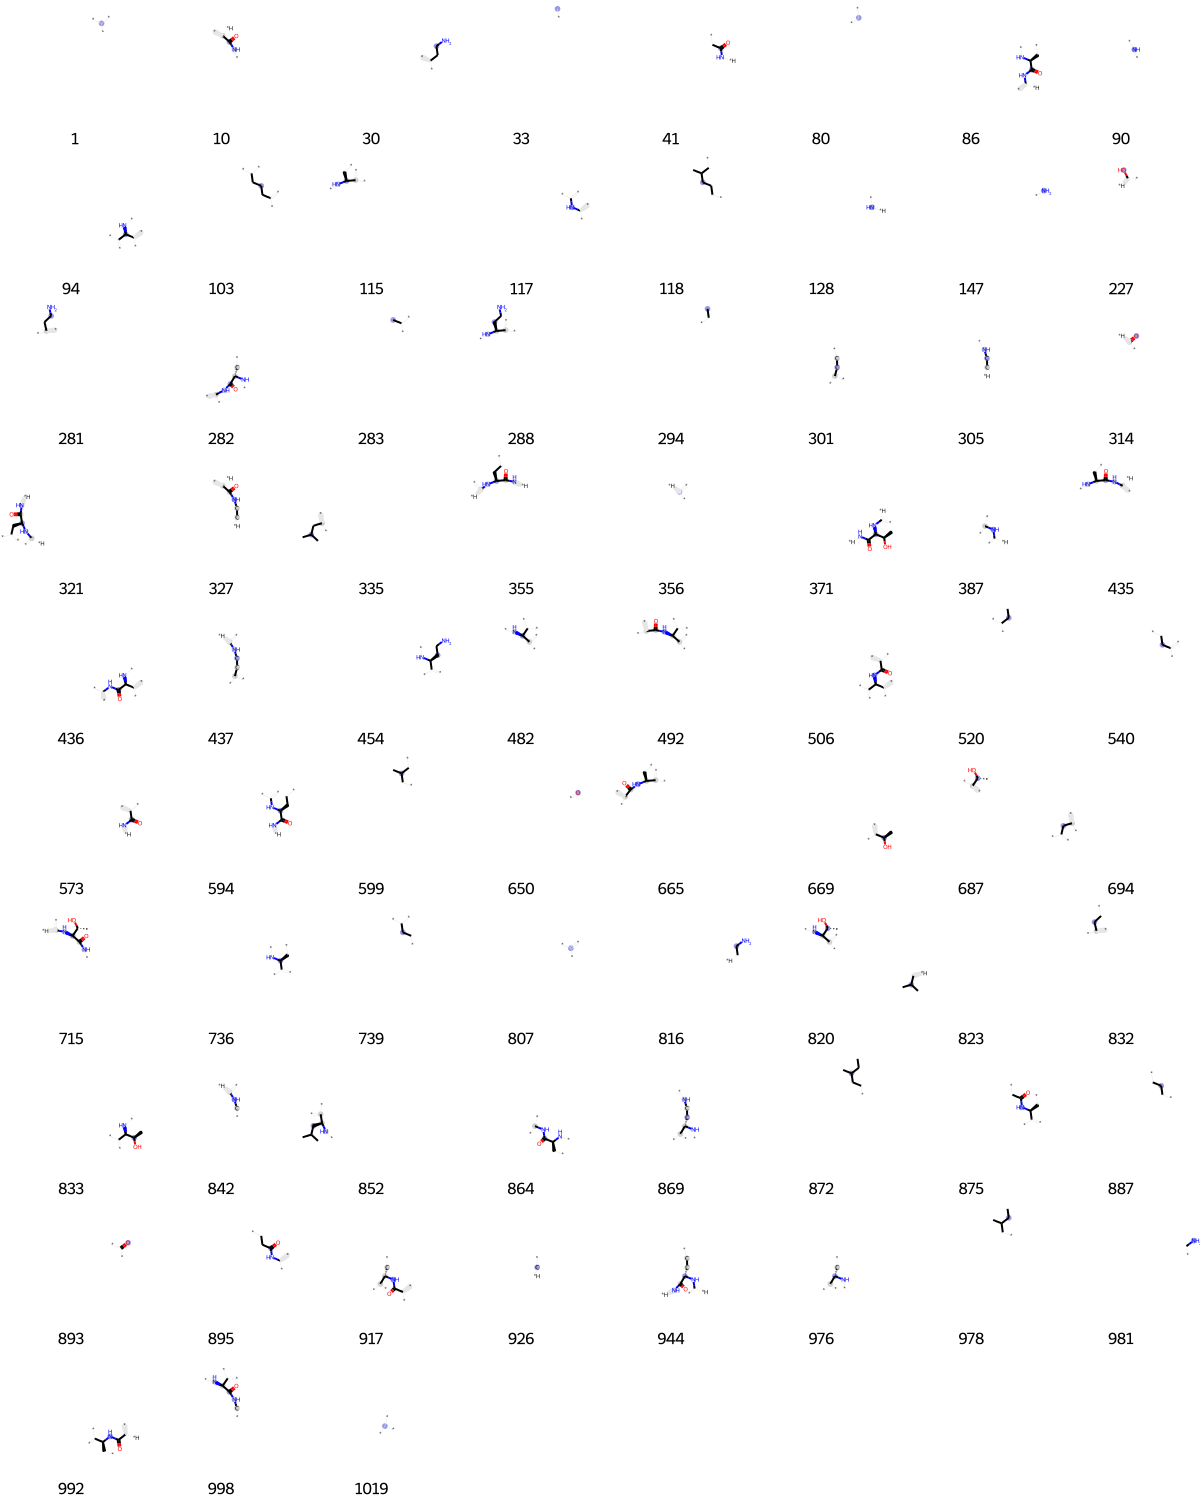

In [498]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [499]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[33, 41, 80, 117, 128, 294, 607, 650, 807, 878, 893, 898, 955, 1016]

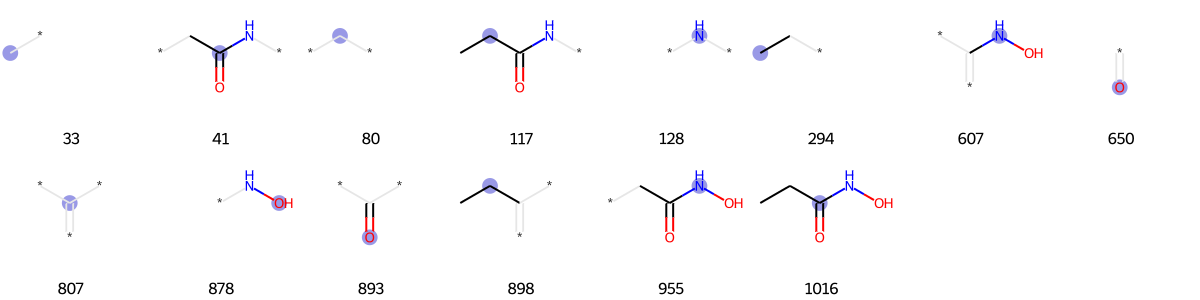

In [500]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [501]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[13,
 33,
 69,
 80,
 90,
 91,
 105,
 108,
 119,
 142,
 195,
 207,
 223,
 227,
 233,
 252,
 259,
 263,
 284,
 285,
 294,
 316,
 325,
 342,
 350,
 351,
 356,
 378,
 389,
 393,
 438,
 456,
 465,
 506,
 540,
 555,
 562,
 578,
 586,
 591,
 597,
 602,
 621,
 650,
 654,
 694,
 698,
 710,
 713,
 716,
 721,
 775,
 807,
 831,
 832,
 849,
 875,
 893,
 914,
 938,
 940,
 955,
 980,
 988,
 1010,
 1018,
 1019]

In [502]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[21,
 33,
 66,
 80,
 102,
 136,
 219,
 222,
 235,
 249,
 263,
 310,
 322,
 325,
 352,
 356,
 386,
 389,
 428,
 463,
 525,
 540,
 586,
 596,
 646,
 650,
 654,
 680,
 695,
 698,
 699,
 713,
 718,
 726,
 730,
 745,
 799,
 807,
 849,
 857,
 875,
 893,
 896,
 904]

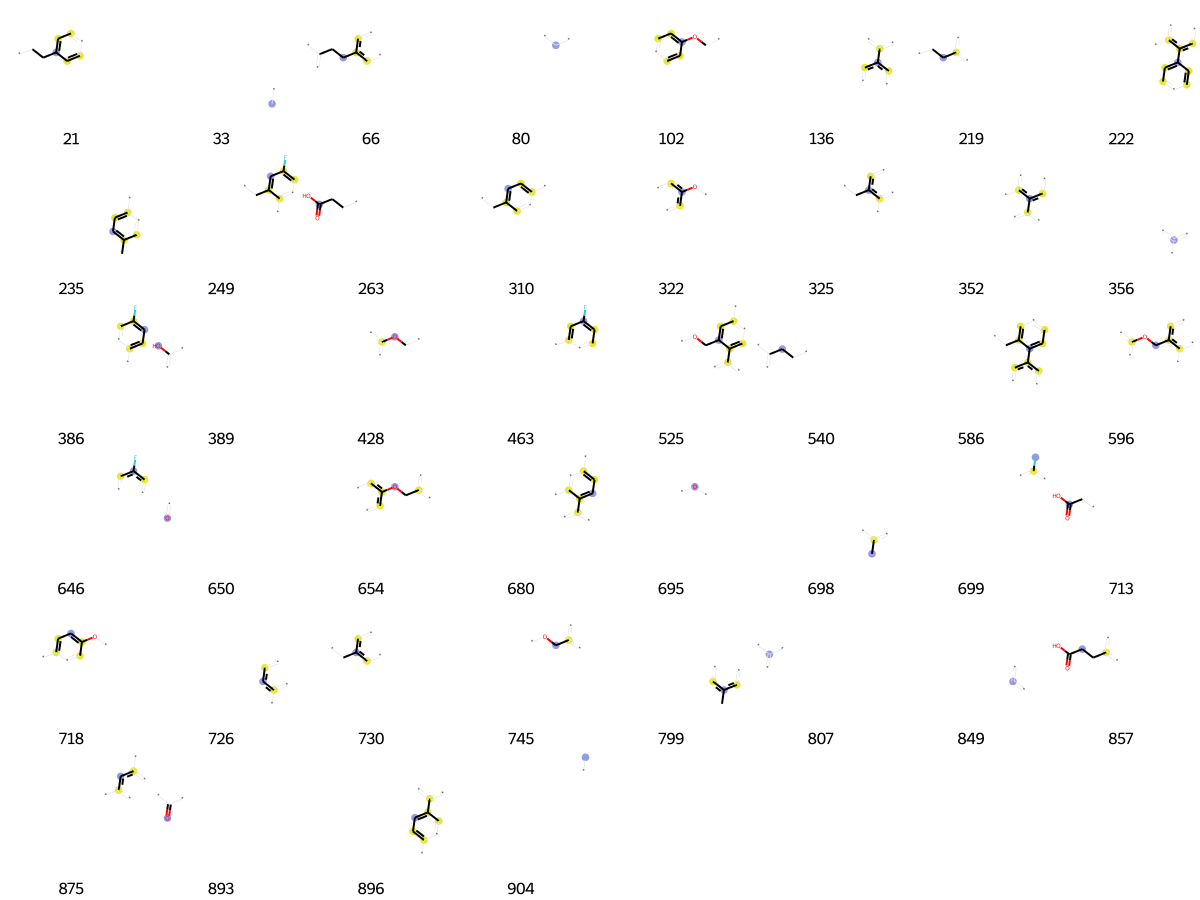

In [503]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [504]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 29,
 33,
 42,
 64,
 80,
 128,
 175,
 216,
 220,
 227,
 241,
 283,
 289,
 301,
 326,
 341,
 356,
 387,
 389,
 432,
 456,
 458,
 512,
 573,
 578,
 605,
 650,
 726,
 730,
 738,
 745,
 754,
 800,
 807,
 820,
 829,
 849,
 872,
 885,
 886,
 893,
 926,
 935,
 1019]

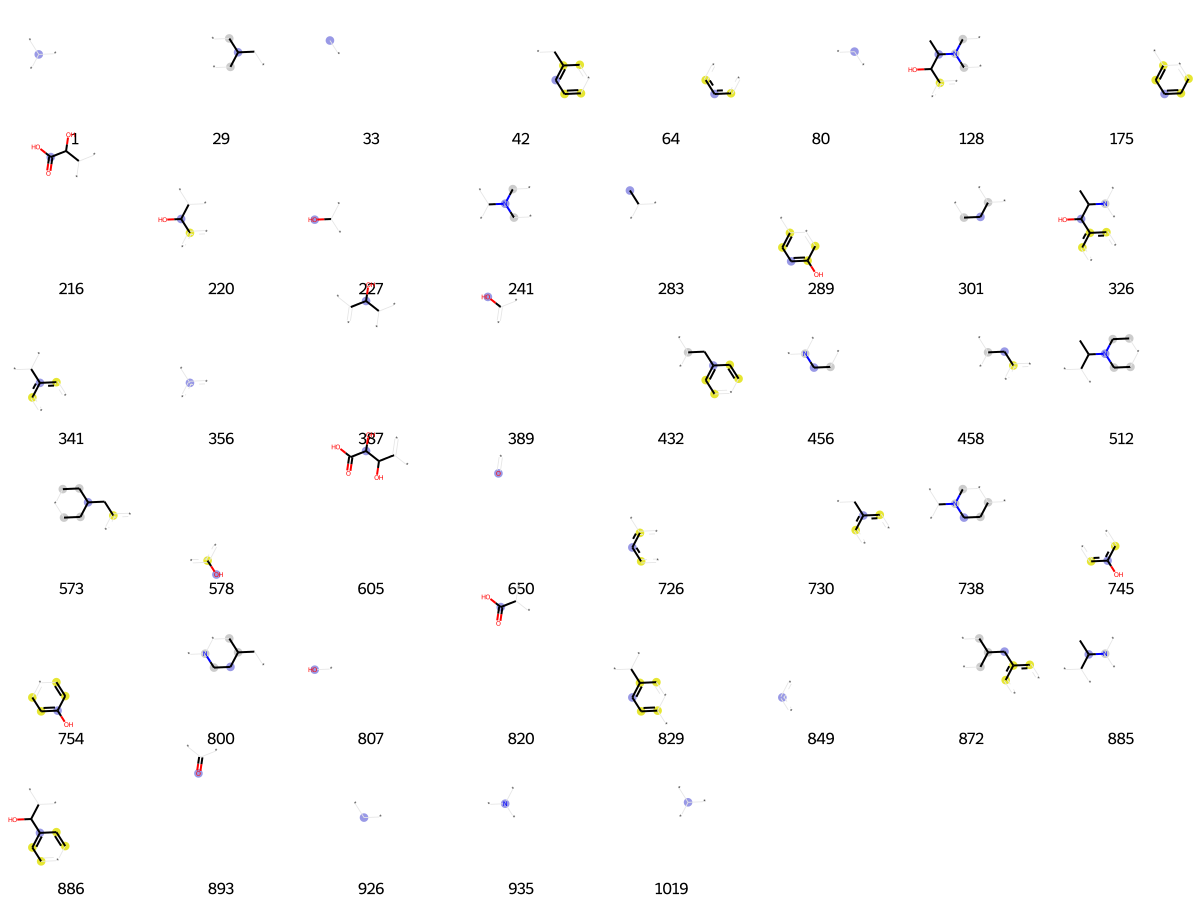

In [505]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [506]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 36,
 75,
 90,
 235,
 284,
 314,
 356,
 413,
 447,
 470,
 484,
 514,
 528,
 552,
 554,
 556,
 562,
 679,
 698,
 726,
 779,
 799,
 849,
 882,
 896,
 926,
 1019]

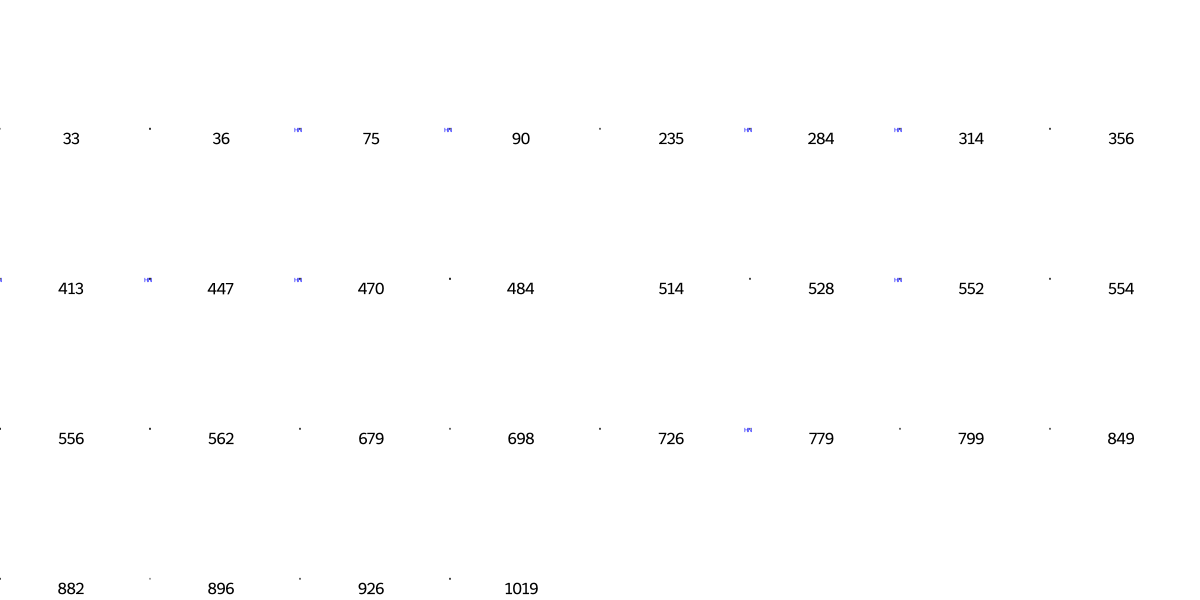

In [507]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [508]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 25,
 33,
 46,
 64,
 73,
 80,
 102,
 107,
 151,
 175,
 214,
 216,
 222,
 223,
 224,
 237,
 241,
 271,
 283,
 289,
 294,
 314,
 322,
 333,
 335,
 356,
 378,
 386,
 389,
 425,
 428,
 456,
 504,
 549,
 561,
 565,
 569,
 578,
 603,
 623,
 650,
 659,
 686,
 695,
 700,
 718,
 726,
 732,
 760,
 776,
 807,
 816,
 831,
 849,
 863,
 893,
 926,
 935,
 946,
 969,
 980,
 985,
 1009]

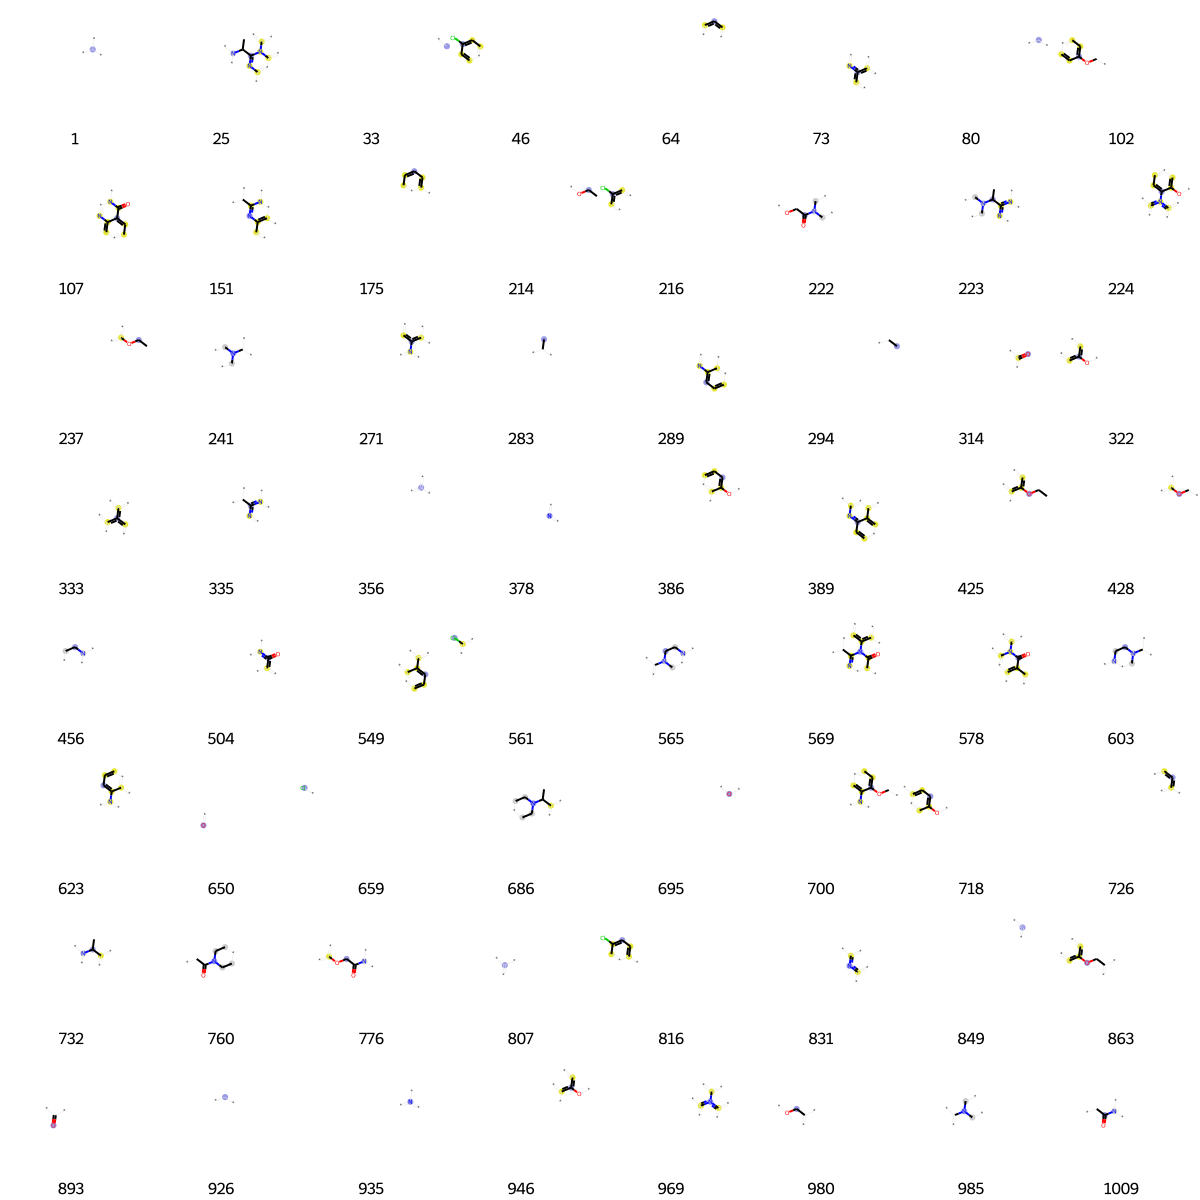

In [509]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [510]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 34,
 102,
 112,
 119,
 231,
 255,
 288,
 301,
 305,
 353,
 356,
 360,
 378,
 473,
 474,
 497,
 511,
 514,
 526,
 539,
 577,
 579,
 674,
 714,
 726,
 756,
 758,
 779,
 790,
 791,
 849,
 926,
 930,
 932,
 935,
 1019]

In [511]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 25,
 33,
 36,
 46,
 53,
 80,
 128,
 147,
 195,
 221,
 222,
 226,
 233,
 258,
 268,
 299,
 300,
 329,
 346,
 356,
 357,
 362,
 370,
 379,
 406,
 413,
 463,
 466,
 482,
 492,
 577,
 593,
 610,
 614,
 621,
 643,
 656,
 672,
 695,
 700,
 740,
 786,
 807,
 808,
 838,
 841,
 868,
 869,
 897,
 926,
 952,
 953,
 965,
 1019,
 1020]

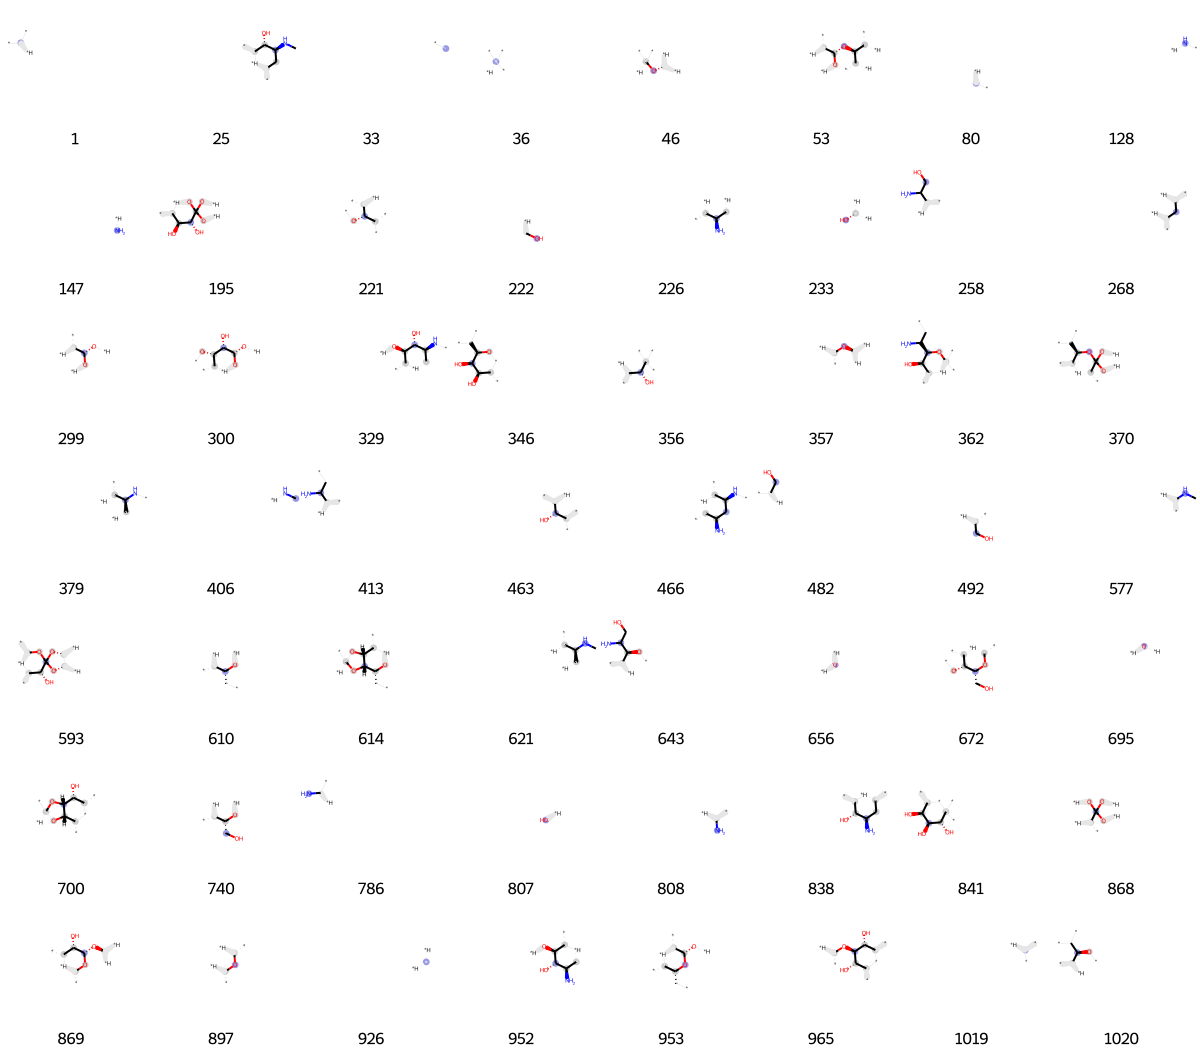

In [512]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [513]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[2,
 4,
 5,
 33,
 36,
 51,
 73,
 78,
 90,
 114,
 125,
 128,
 162,
 189,
 200,
 215,
 232,
 246,
 264,
 268,
 276,
 280,
 301,
 307,
 308,
 310,
 312,
 314,
 320,
 322,
 328,
 342,
 344,
 350,
 356,
 357,
 378,
 381,
 392,
 402,
 409,
 416,
 429,
 452,
 463,
 490,
 500,
 512,
 524,
 531,
 573,
 585,
 594,
 621,
 627,
 641,
 650,
 656,
 679,
 684,
 689,
 694,
 695,
 711,
 712,
 714,
 718,
 726,
 727,
 739,
 750,
 781,
 795,
 807,
 816,
 819,
 826,
 831,
 841,
 849,
 855,
 875,
 890,
 893,
 919,
 924,
 926,
 935,
 937,
 940,
 948,
 949,
 955,
 961,
 988,
 1019]

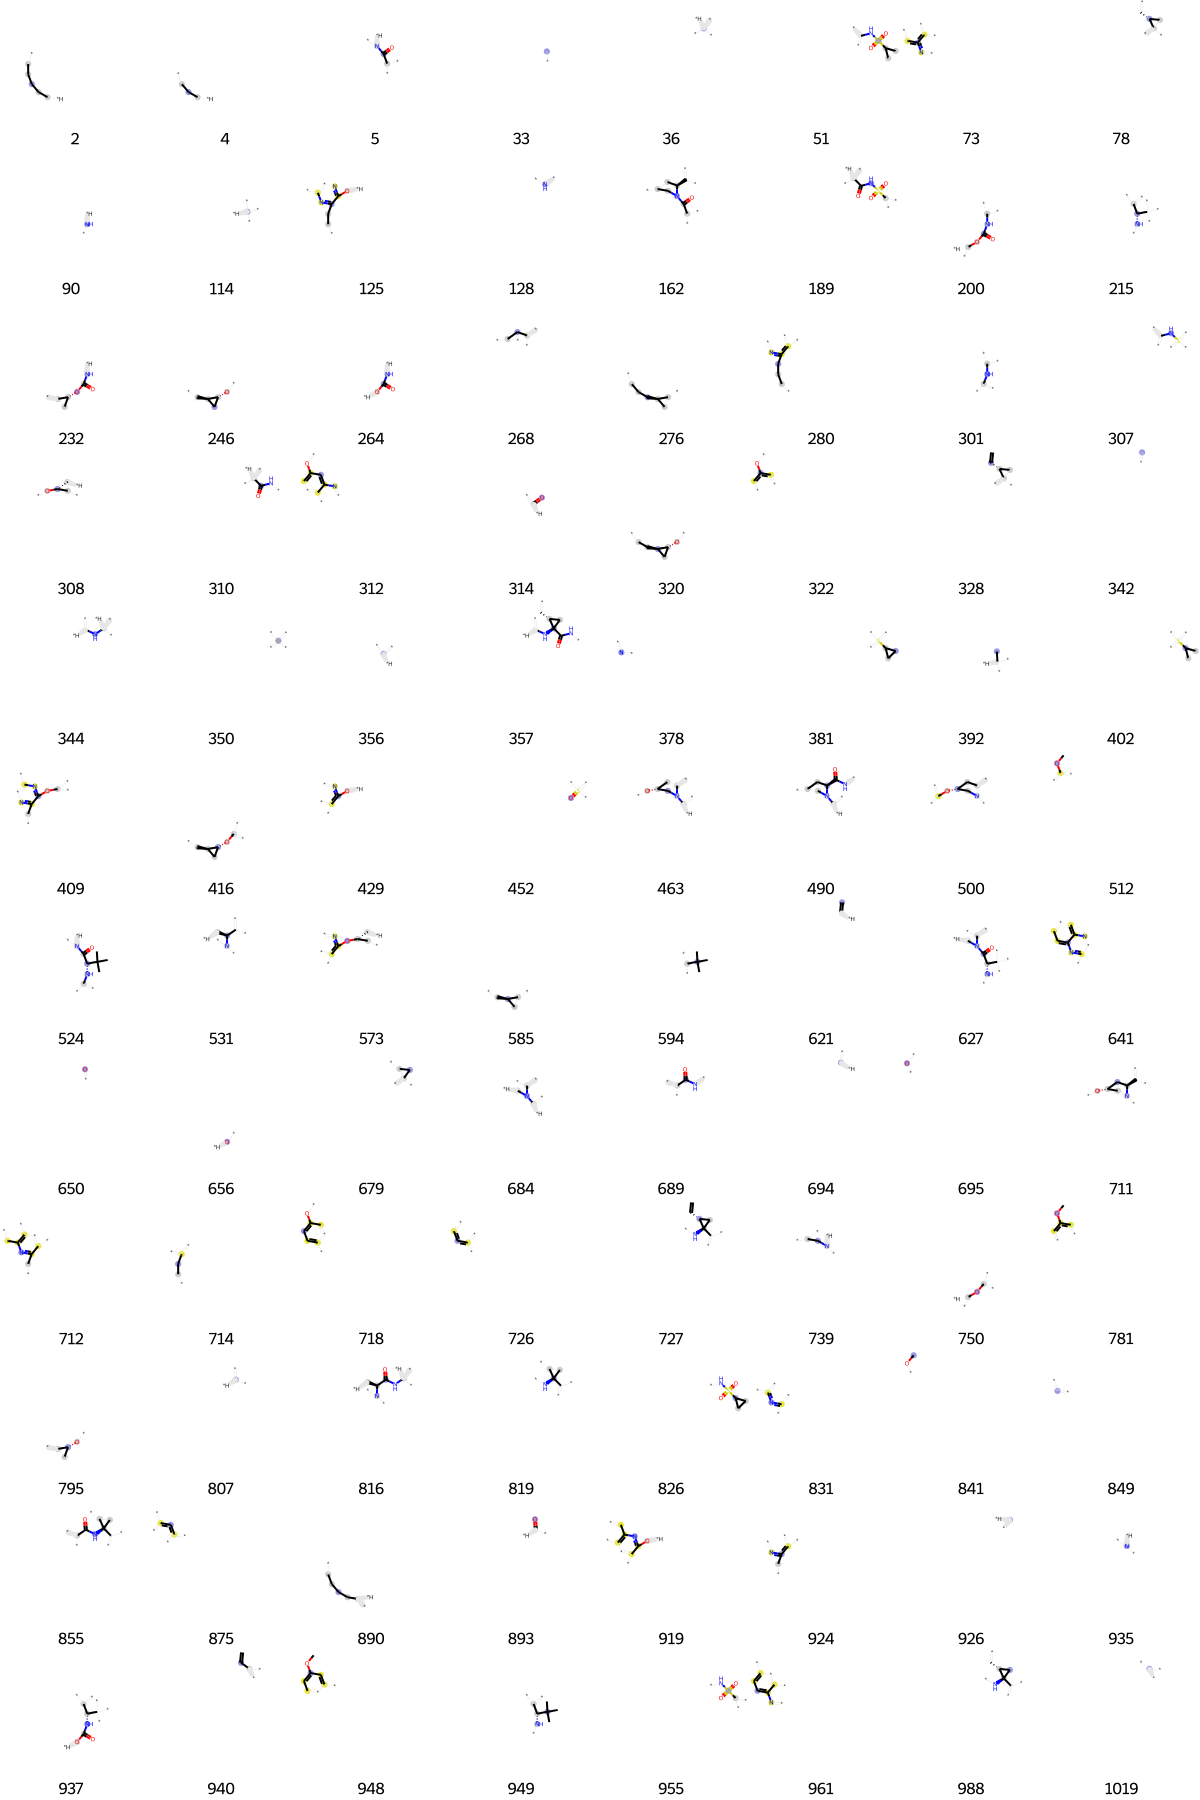

In [514]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [515]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[12,
 64,
 75,
 80,
 128,
 131,
 175,
 255,
 310,
 315,
 356,
 378,
 392,
 428,
 448,
 638,
 726,
 730,
 842,
 849,
 897,
 980,
 993]

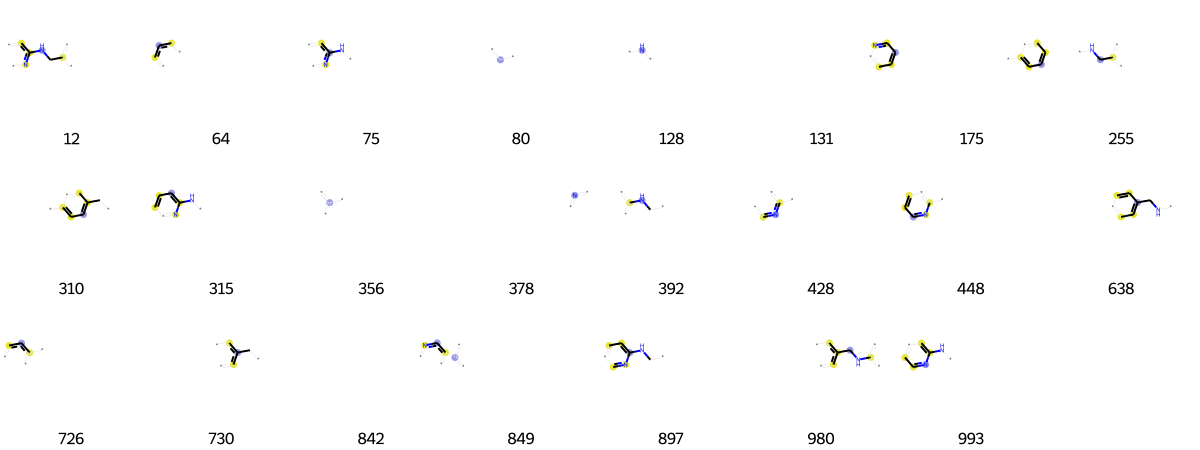

In [516]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [517]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[46,
 73,
 80,
 86,
 114,
 147,
 216,
 283,
 350,
 356,
 393,
 452,
 561,
 592,
 641,
 650,
 659,
 692,
 726,
 747,
 751,
 789,
 807,
 816,
 849,
 863,
 884,
 981,
 1002]

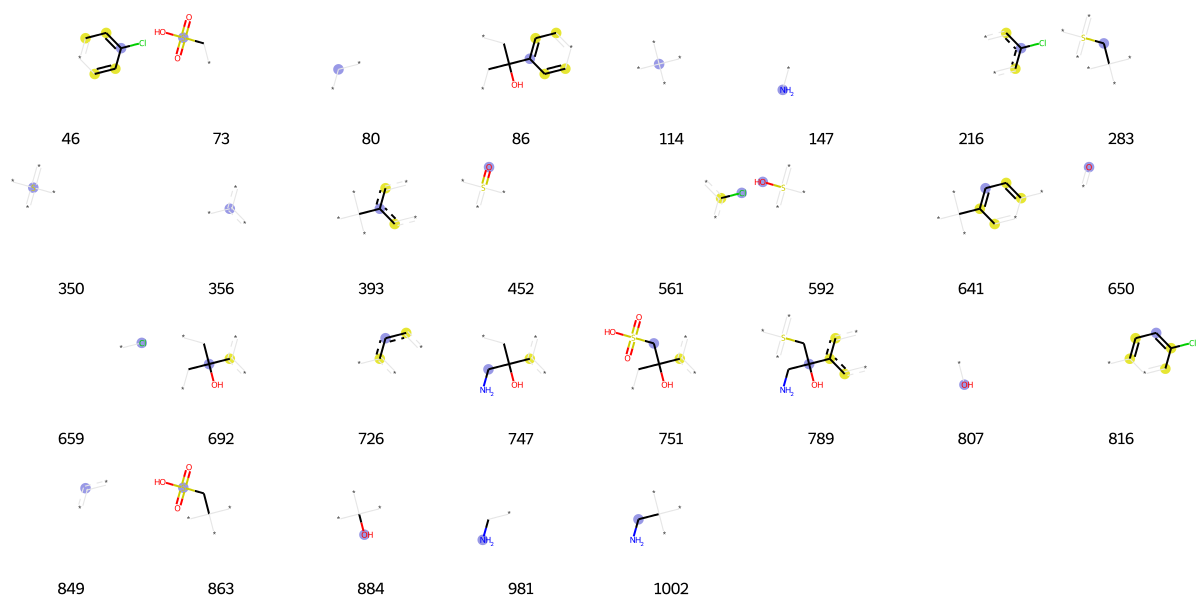

In [518]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [519]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[15,
 64,
 89,
 90,
 149,
 212,
 268,
 305,
 313,
 356,
 361,
 366,
 371,
 378,
 393,
 407,
 444,
 527,
 561,
 659,
 663,
 684,
 726,
 836,
 842,
 849,
 881,
 922,
 926,
 935,
 974,
 986,
 1022]

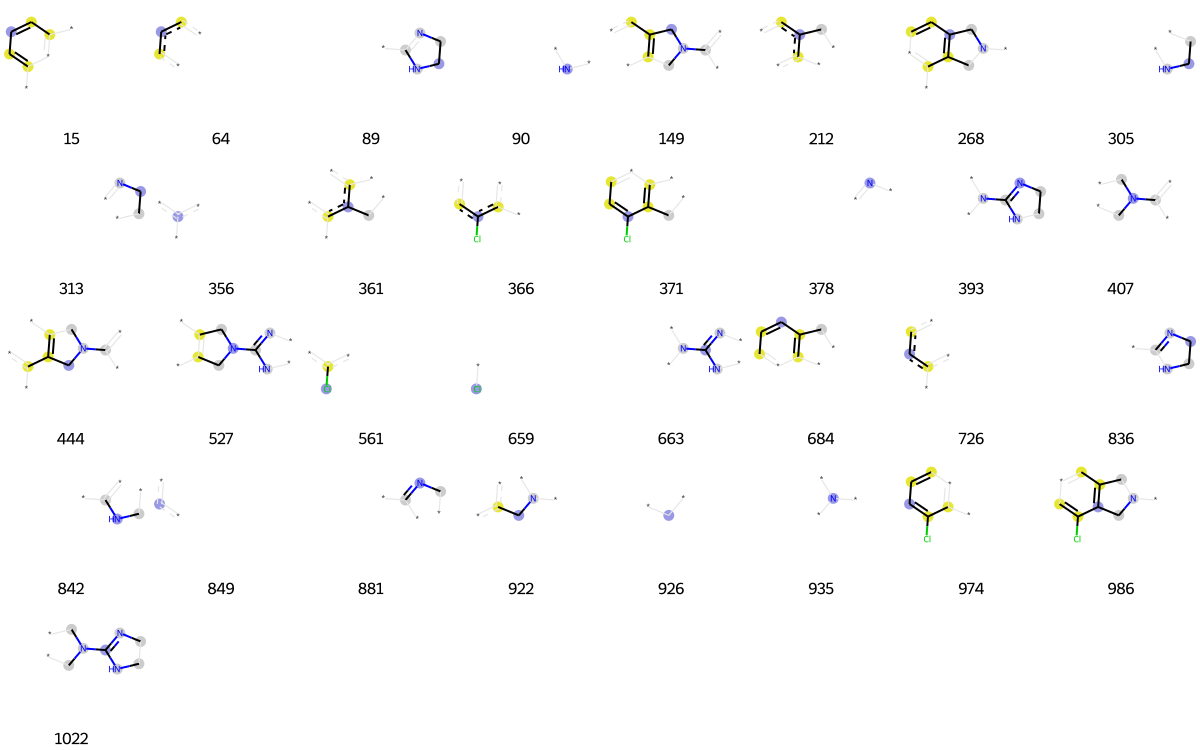

In [520]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [521]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 3,
 15,
 23,
 33,
 64,
 80,
 84,
 94,
 112,
 128,
 136,
 170,
 186,
 194,
 201,
 248,
 263,
 265,
 283,
 301,
 352,
 356,
 360,
 361,
 371,
 378,
 389,
 397,
 422,
 448,
 458,
 459,
 504,
 518,
 540,
 545,
 555,
 607,
 650,
 656,
 664,
 667,
 674,
 695,
 713,
 714,
 726,
 729,
 790,
 807,
 811,
 831,
 838,
 849,
 875,
 886,
 888,
 893,
 896,
 926,
 946,
 954,
 976,
 984,
 1001,
 1019]

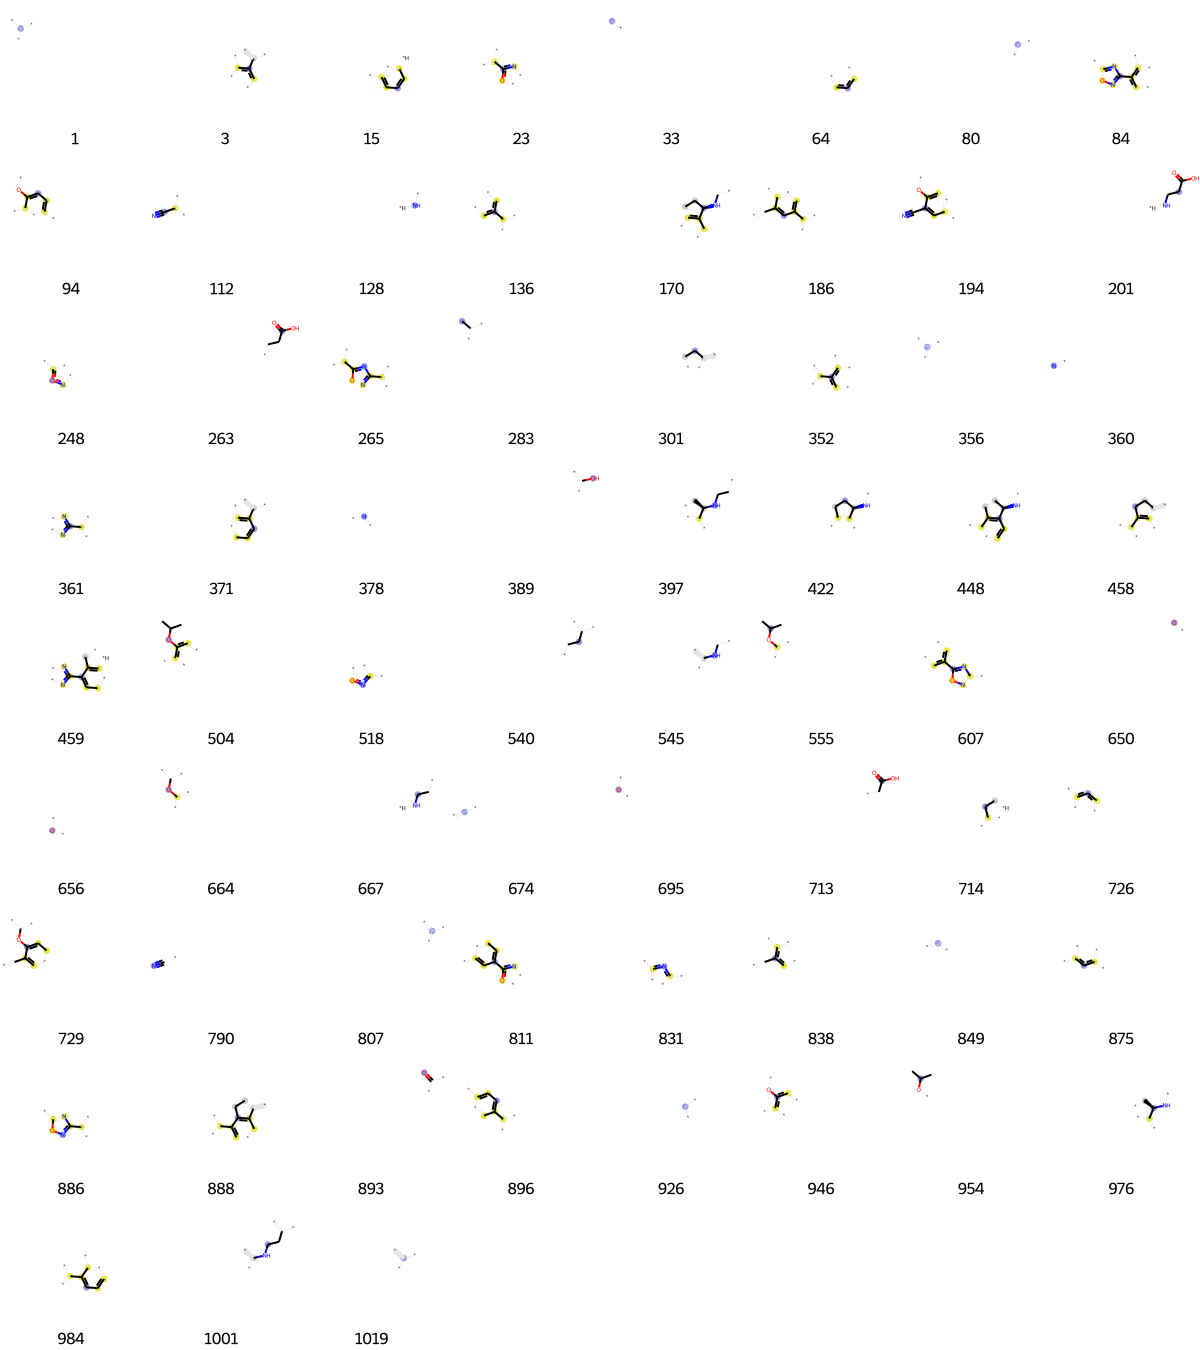

In [522]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [523]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 4,
 33,
 64,
 79,
 80,
 81,
 86,
 90,
 108,
 117,
 119,
 121,
 128,
 132,
 140,
 147,
 151,
 175,
 193,
 197,
 222,
 231,
 242,
 283,
 289,
 294,
 301,
 305,
 310,
 314,
 325,
 328,
 333,
 354,
 356,
 362,
 364,
 369,
 378,
 389,
 409,
 427,
 428,
 446,
 456,
 457,
 458,
 482,
 488,
 508,
 531,
 549,
 551,
 573,
 575,
 578,
 583,
 592,
 600,
 609,
 623,
 624,
 625,
 648,
 650,
 661,
 664,
 667,
 680,
 689,
 702,
 708,
 713,
 714,
 724,
 726,
 730,
 734,
 736,
 739,
 745,
 754,
 759,
 806,
 807,
 823,
 837,
 841,
 849,
 852,
 855,
 857,
 887,
 893,
 894,
 913,
 926,
 927,
 931,
 935,
 946,
 982,
 983,
 985,
 992,
 1017,
 1019]

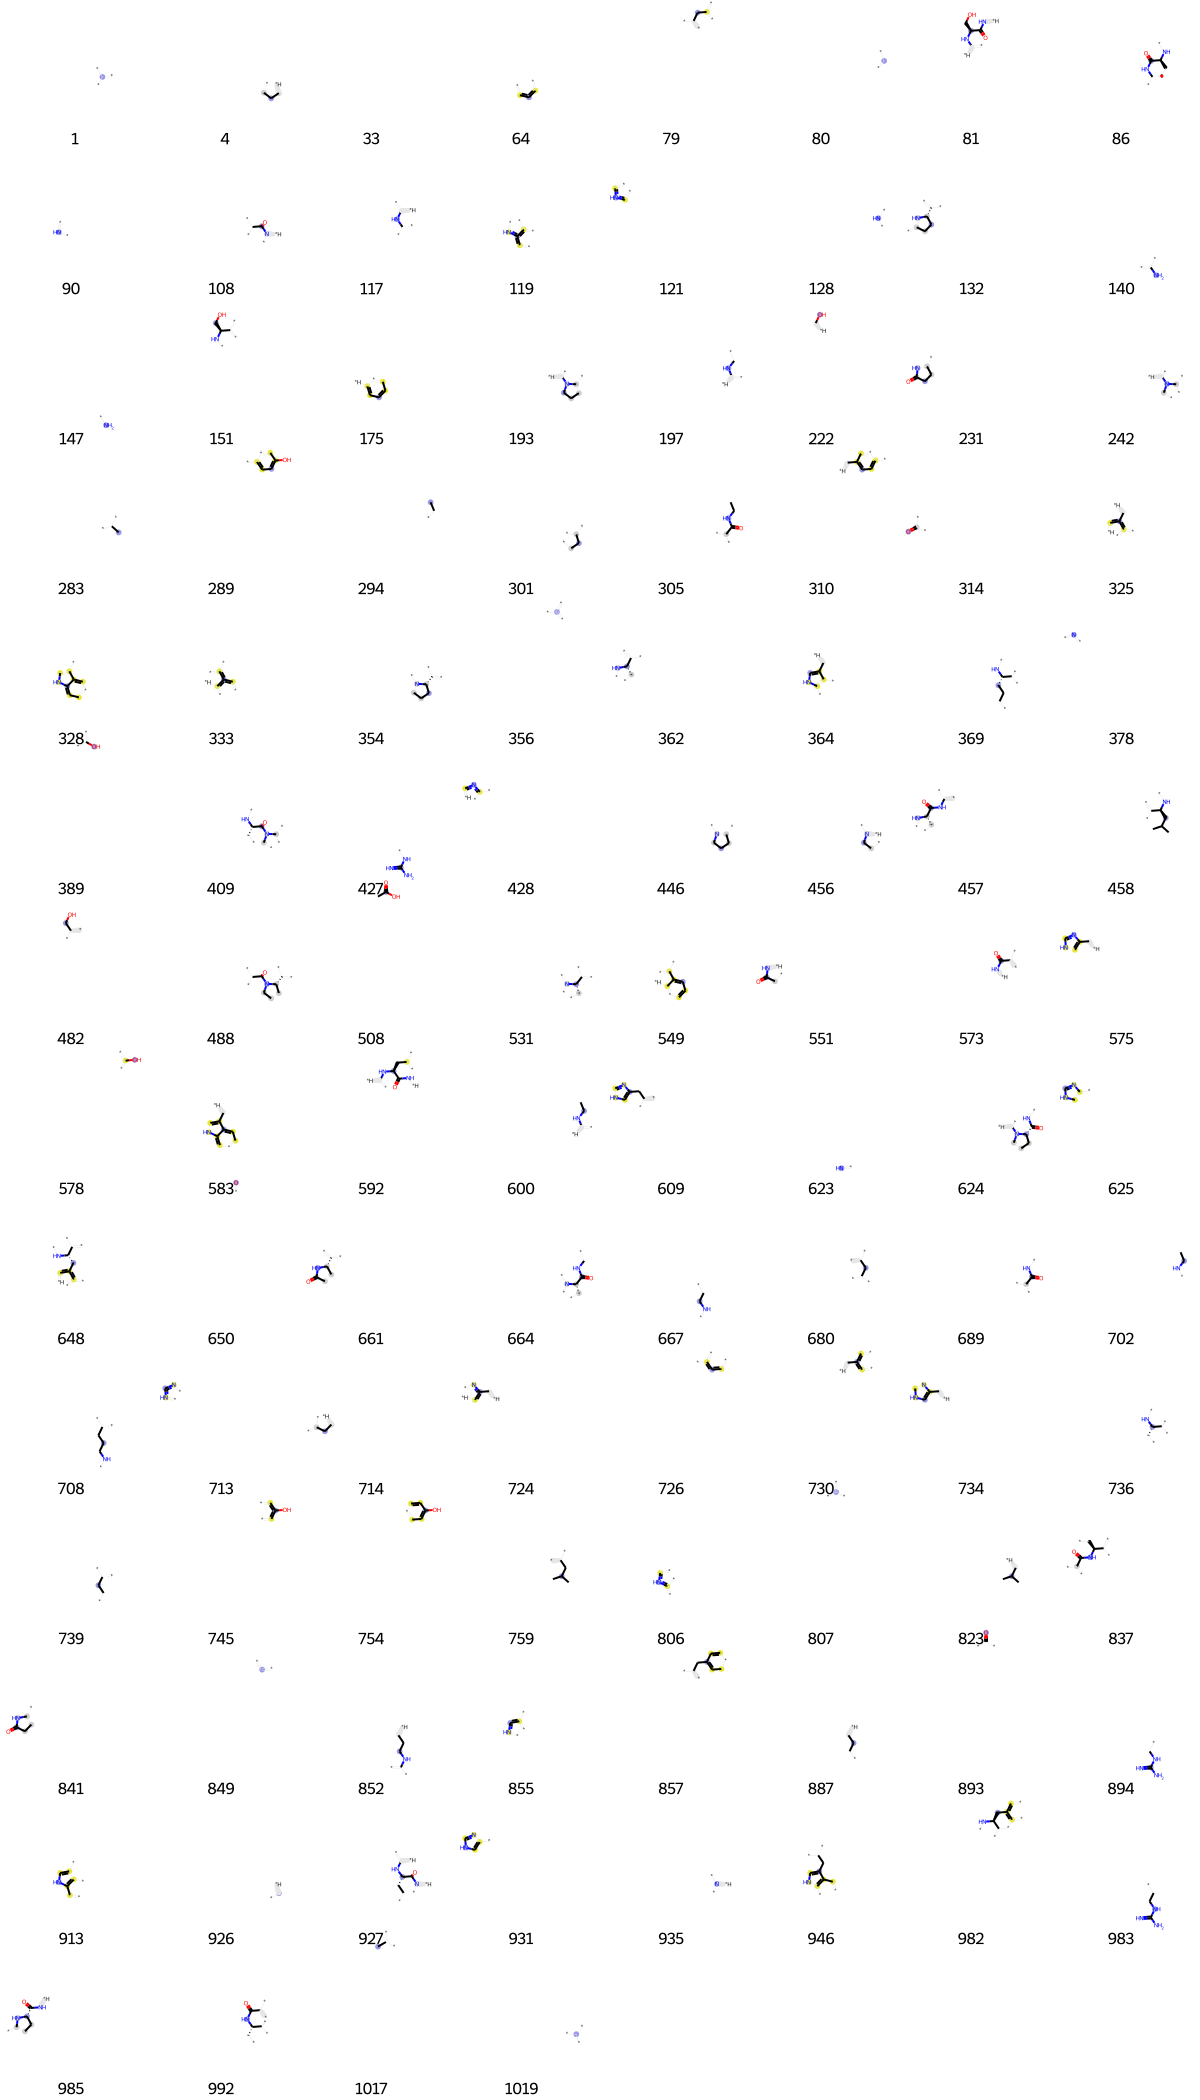

In [524]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [525]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[75,
 80,
 112,
 147,
 152,
 178,
 209,
 210,
 222,
 233,
 356,
 357,
 360,
 361,
 378,
 428,
 433,
 435,
 454,
 463,
 464,
 489,
 492,
 548,
 577,
 610,
 656,
 672,
 674,
 706,
 726,
 740,
 786,
 790,
 807,
 820,
 838,
 849,
 897,
 935,
 960,
 1001,
 1011,
 1019]

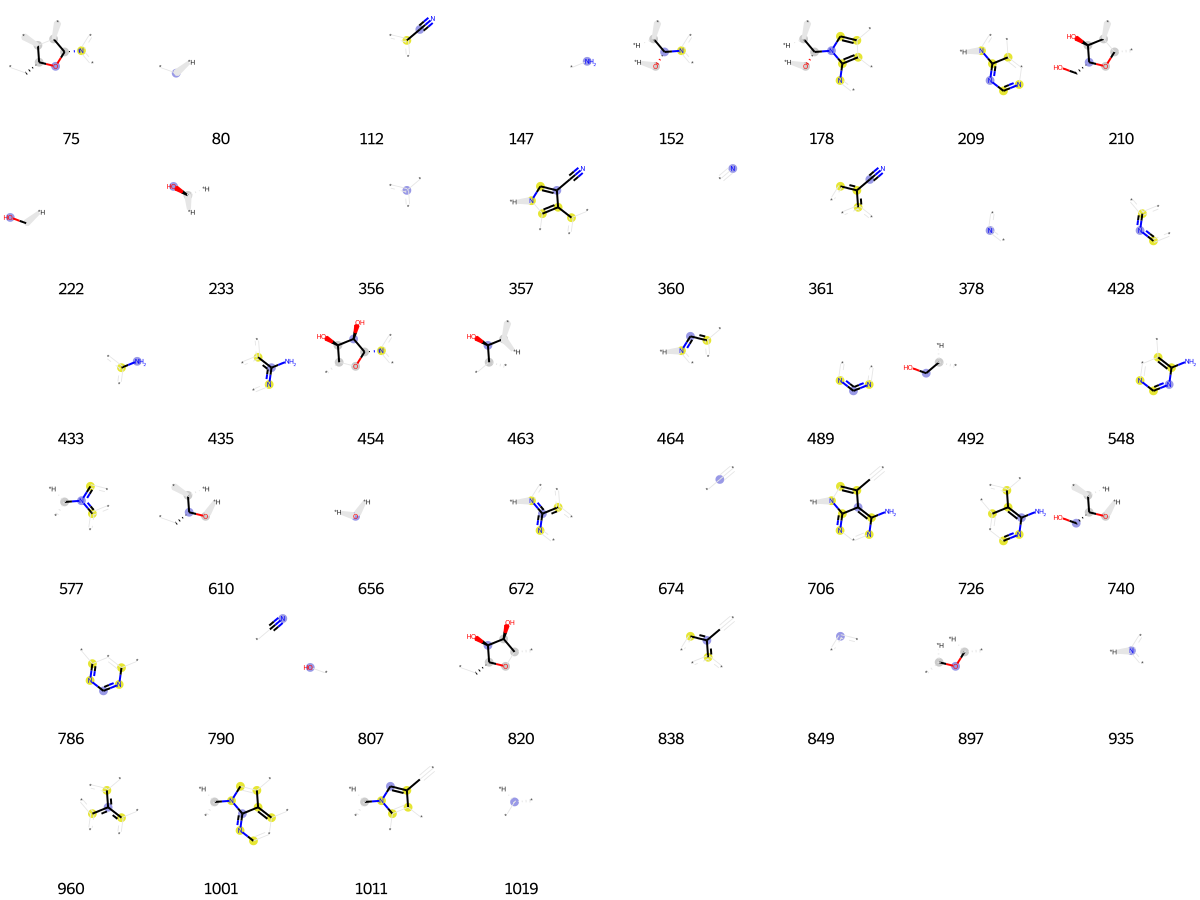

In [526]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [527]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 10,
 22,
 32,
 33,
 36,
 41,
 47,
 80,
 90,
 101,
 107,
 115,
 119,
 128,
 140,
 147,
 181,
 182,
 194,
 197,
 203,
 222,
 250,
 266,
 282,
 285,
 290,
 301,
 305,
 314,
 350,
 356,
 382,
 431,
 435,
 437,
 443,
 452,
 457,
 470,
 472,
 492,
 493,
 502,
 513,
 543,
 550,
 580,
 587,
 592,
 594,
 623,
 633,
 646,
 650,
 661,
 665,
 667,
 694,
 696,
 697,
 739,
 772,
 774,
 786,
 795,
 797,
 807,
 808,
 816,
 842,
 869,
 880,
 882,
 887,
 893,
 925,
 926,
 934,
 968,
 978,
 981,
 984,
 995,
 1019]

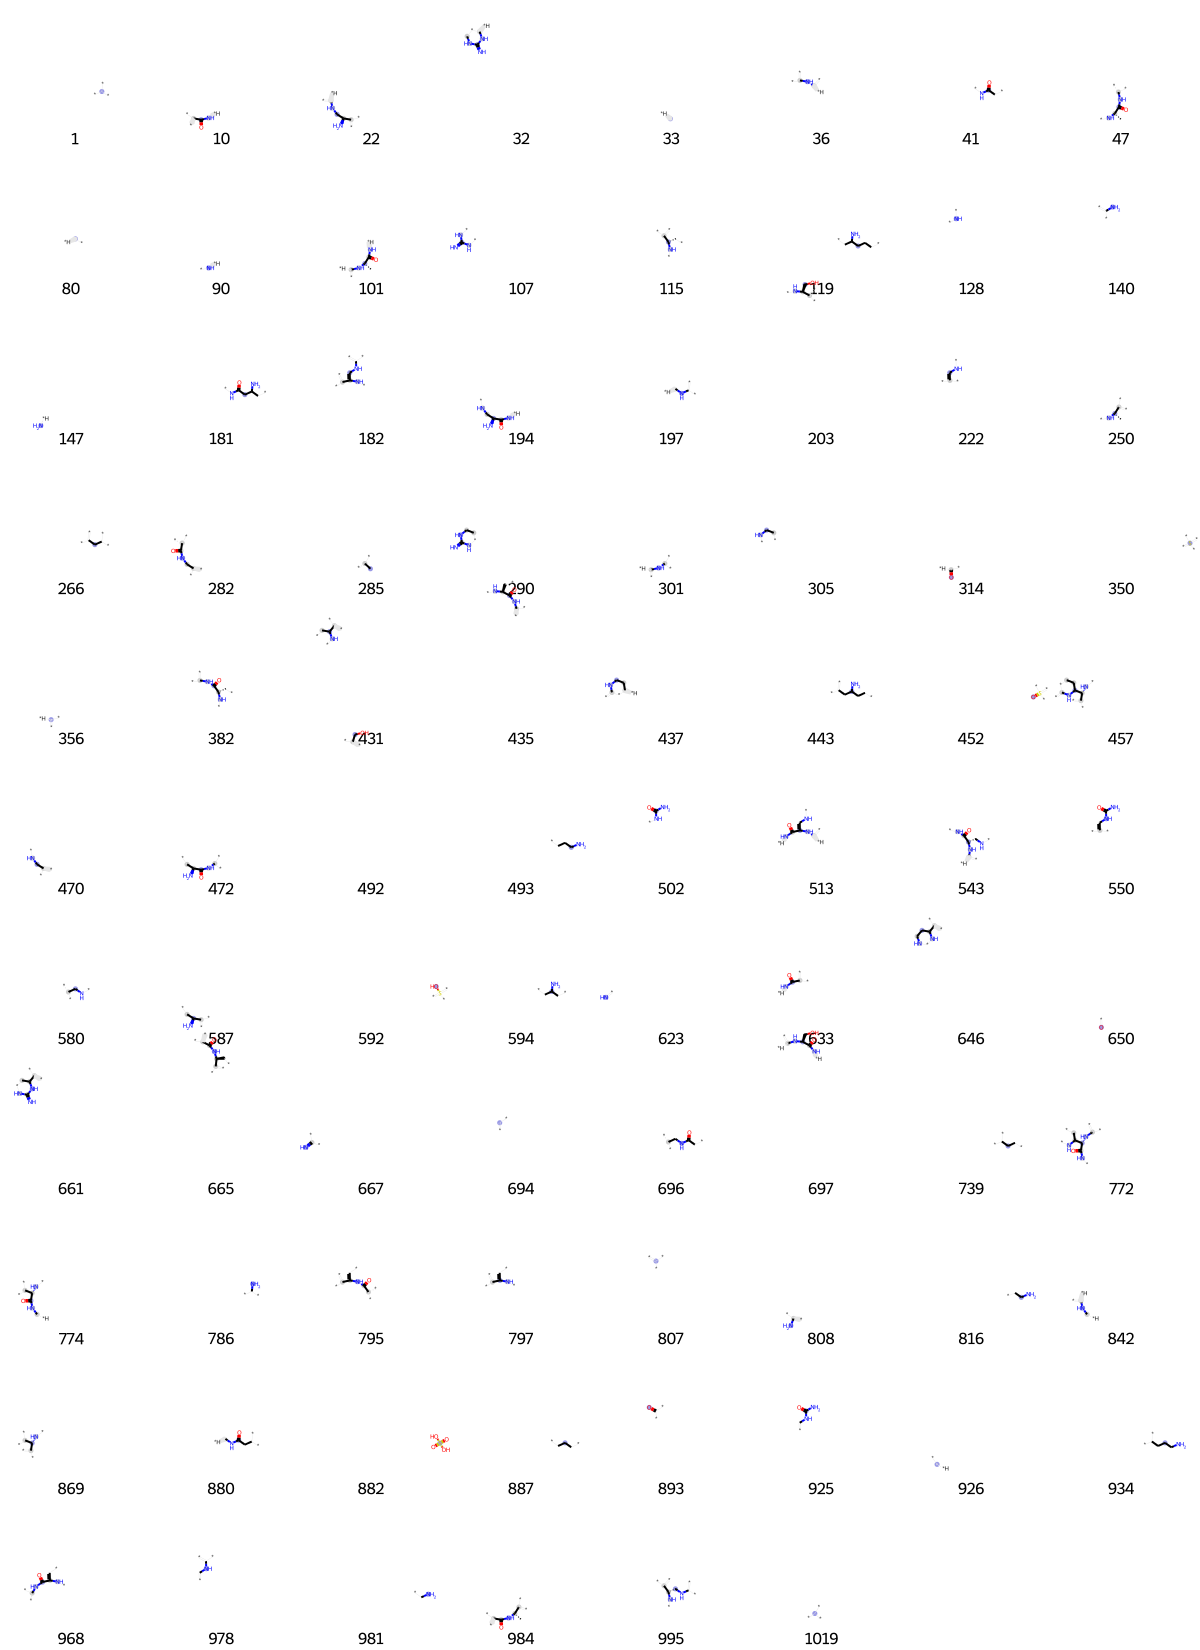

In [528]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [529]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 4,
 21,
 33,
 42,
 51,
 64,
 80,
 97,
 108,
 128,
 139,
 145,
 147,
 153,
 175,
 214,
 219,
 255,
 268,
 276,
 283,
 294,
 301,
 356,
 370,
 389,
 407,
 428,
 476,
 500,
 531,
 559,
 573,
 585,
 650,
 665,
 695,
 698,
 726,
 730,
 736,
 739,
 794,
 807,
 808,
 849,
 890,
 893,
 926,
 935,
 979,
 989,
 1019]

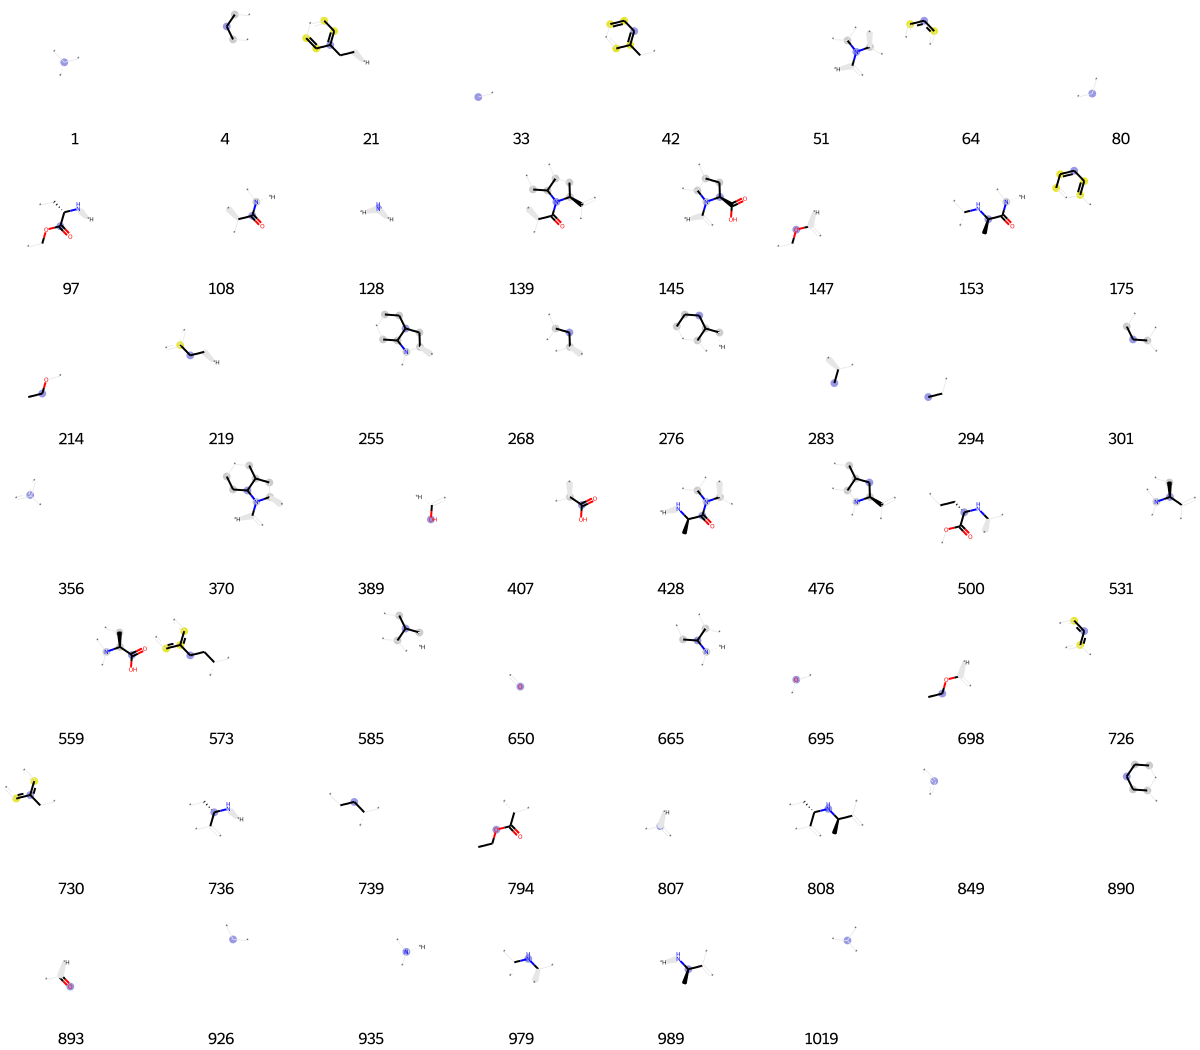

In [530]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [531]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[21,
 36,
 42,
 64,
 80,
 90,
 121,
 138,
 175,
 218,
 219,
 256,
 258,
 264,
 314,
 320,
 356,
 368,
 376,
 389,
 408,
 447,
 456,
 458,
 492,
 514,
 611,
 650,
 656,
 726,
 730,
 767,
 774,
 842,
 849,
 926,
 935]

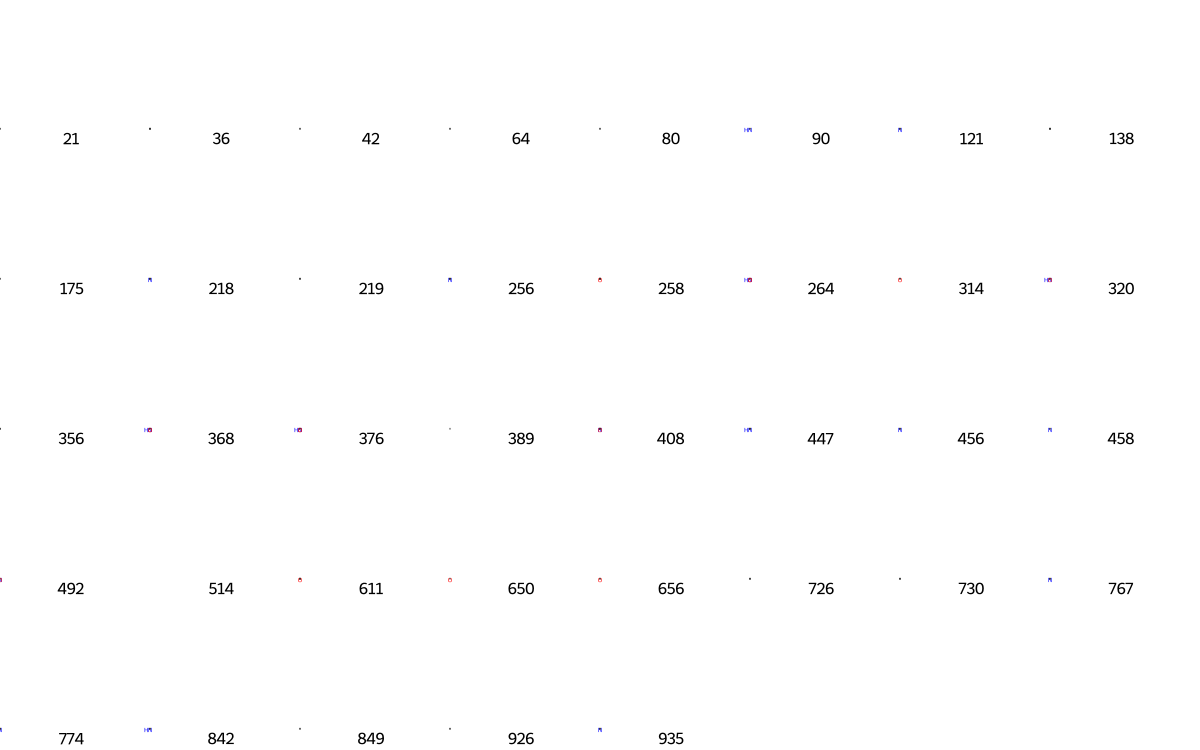

In [532]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [533]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[23,
 33,
 89,
 90,
 146,
 285,
 296,
 301,
 305,
 308,
 314,
 326,
 333,
 338,
 352,
 356,
 378,
 389,
 407,
 416,
 444,
 453,
 456,
 464,
 483,
 512,
 513,
 525,
 575,
 577,
 578,
 590,
 624,
 650,
 695,
 699,
 705,
 739,
 804,
 807,
 816,
 825,
 841,
 844,
 849,
 875,
 886,
 893,
 904,
 926,
 935,
 967,
 1019]

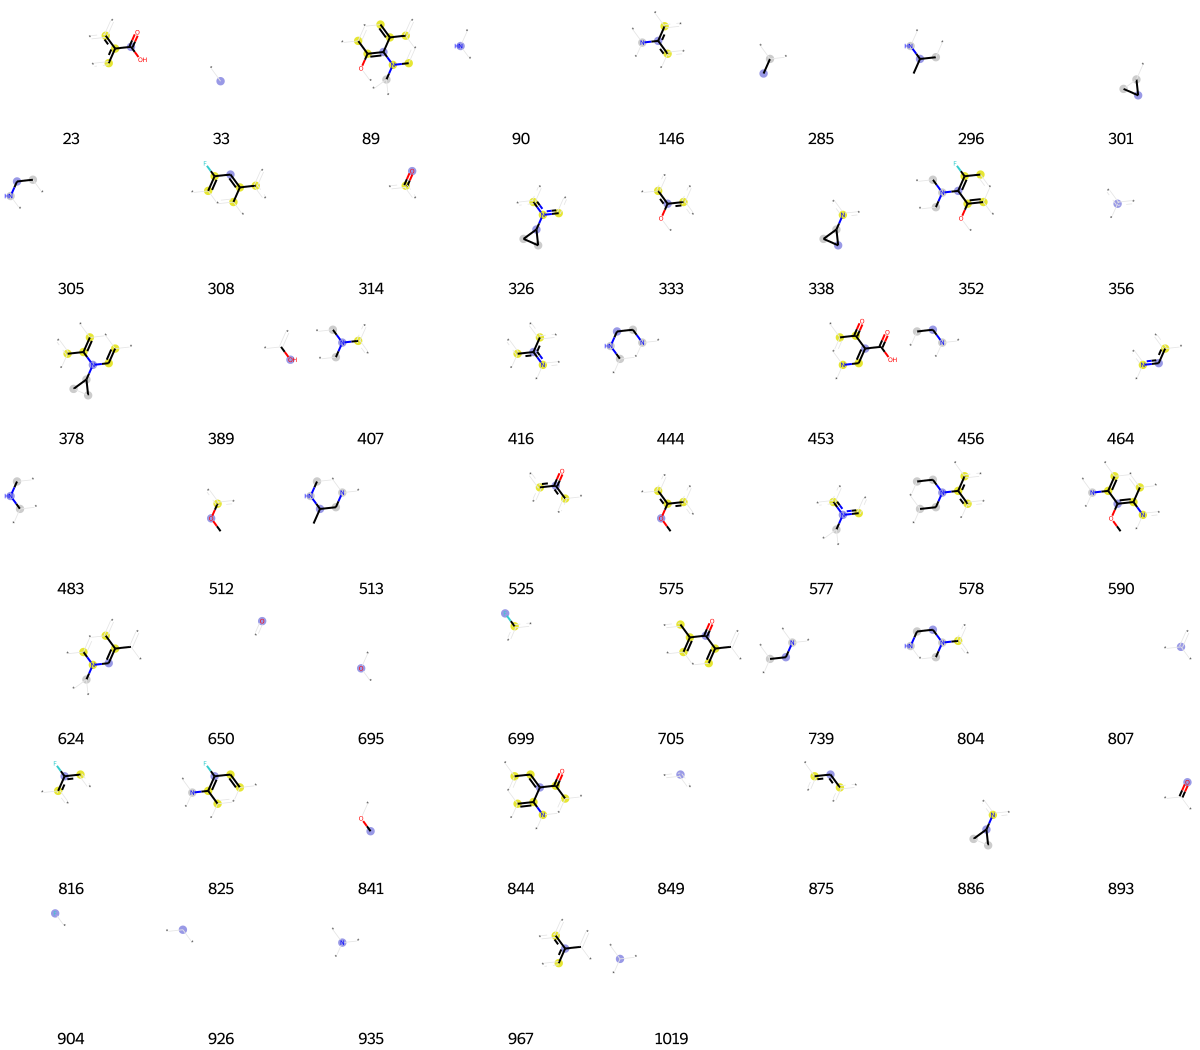

In [534]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [535]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[4,
 8,
 14,
 33,
 42,
 59,
 64,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 140,
 144,
 175,
 207,
 212,
 221,
 232,
 237,
 249,
 301,
 333,
 335,
 356,
 378,
 389,
 407,
 456,
 484,
 512,
 565,
 610,
 624,
 644,
 659,
 680,
 695,
 708,
 726,
 730,
 741,
 747,
 767,
 780,
 784,
 831,
 834,
 841,
 849,
 875,
 891,
 926,
 935,
 946,
 1018,
 1019]

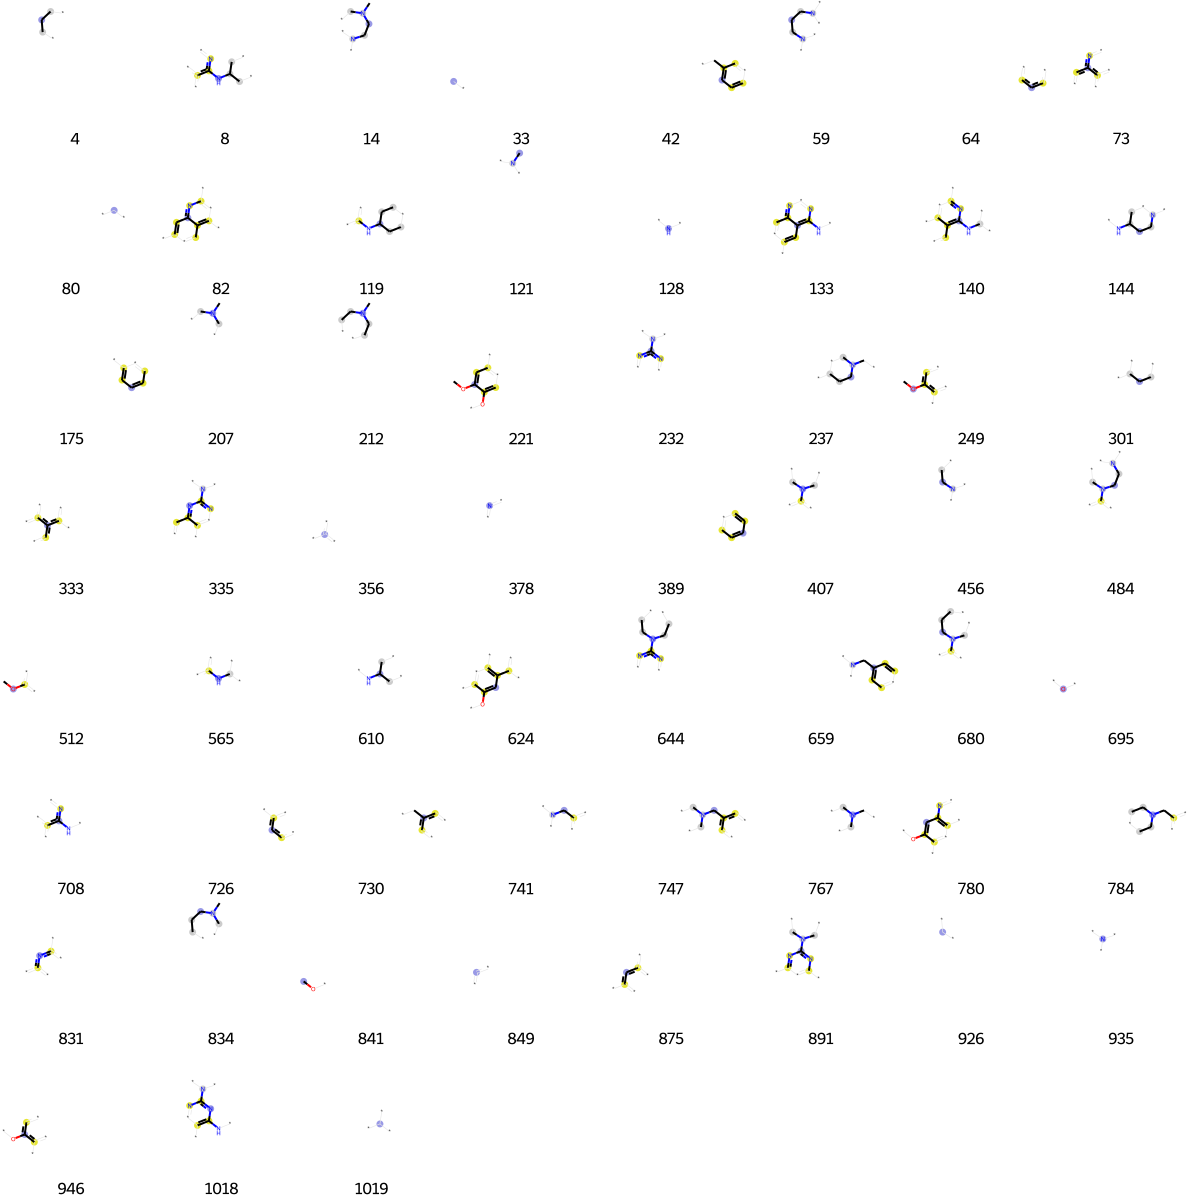

In [536]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [537]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 36,
 41,
 78,
 80,
 89,
 114,
 128,
 130,
 139,
 140,
 147,
 160,
 161,
 165,
 196,
 200,
 202,
 231,
 246,
 267,
 268,
 276,
 314,
 317,
 342,
 356,
 361,
 373,
 392,
 397,
 402,
 416,
 427,
 429,
 453,
 519,
 541,
 545,
 550,
 554,
 559,
 571,
 578,
 585,
 600,
 603,
 606,
 611,
 650,
 673,
 676,
 698,
 723,
 747,
 792,
 807,
 824,
 842,
 849,
 852,
 874,
 875,
 881,
 893,
 921,
 924,
 926,
 994,
 1019]

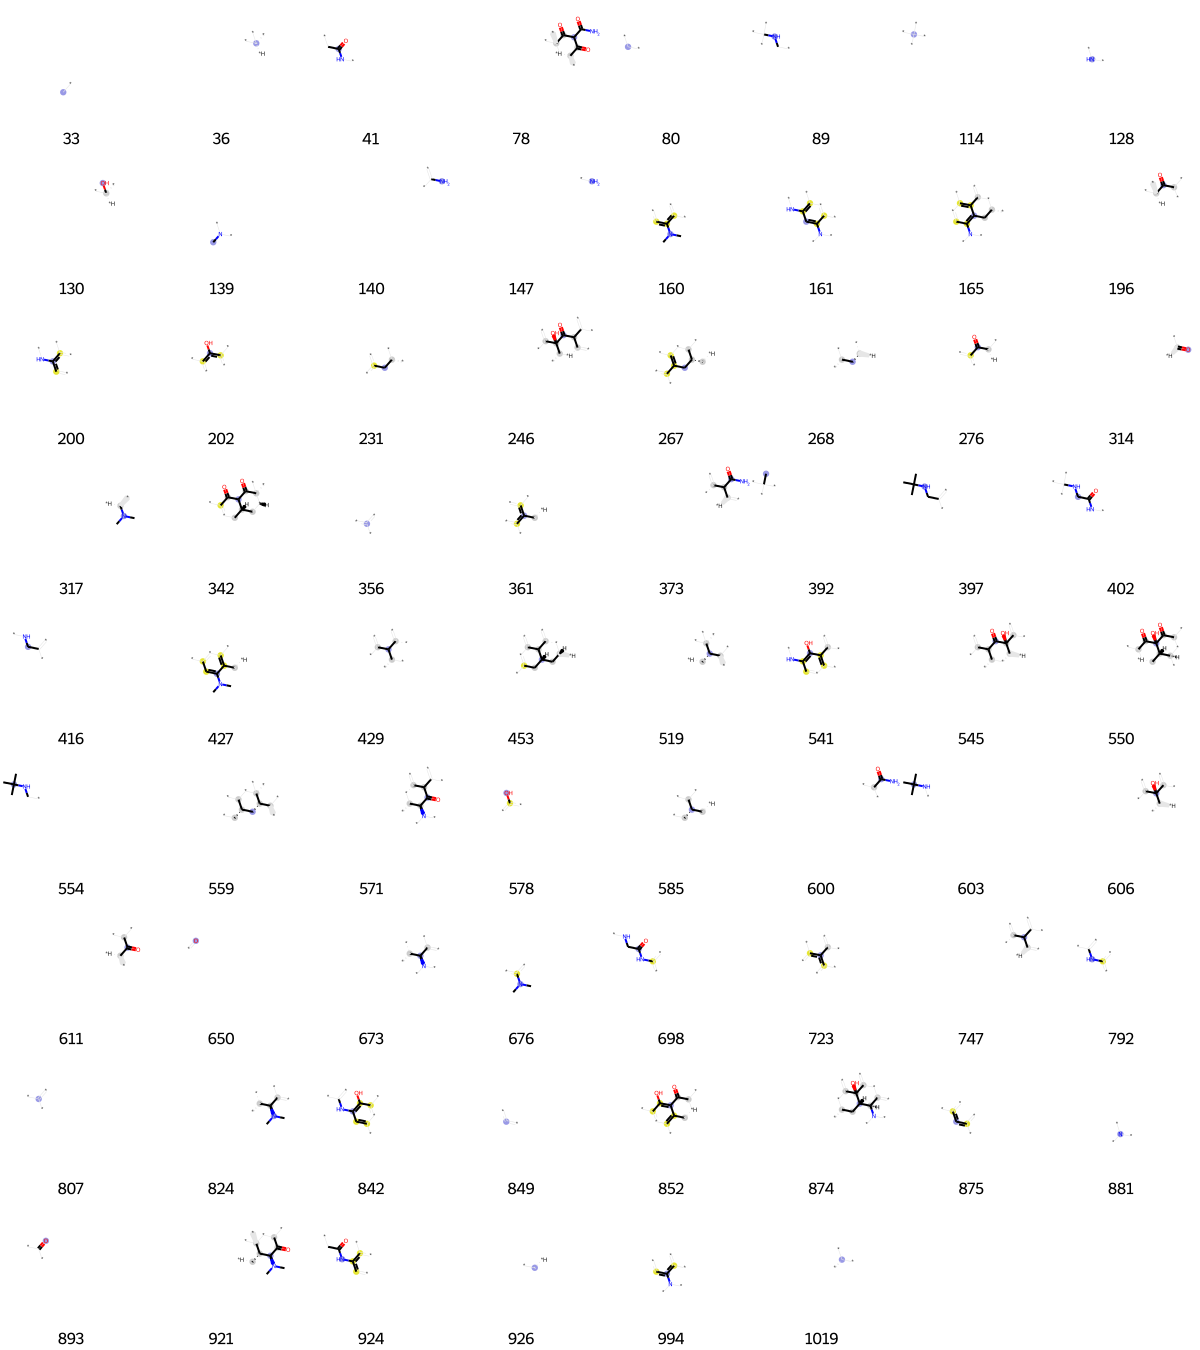

In [538]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [539]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[3,
 7,
 14,
 20,
 33,
 52,
 64,
 76,
 116,
 177,
 202,
 210,
 221,
 227,
 233,
 241,
 249,
 255,
 288,
 299,
 307,
 314,
 321,
 325,
 356,
 357,
 383,
 429,
 433,
 441,
 447,
 463,
 475,
 477,
 481,
 489,
 512,
 543,
 564,
 578,
 622,
 649,
 650,
 656,
 675,
 677,
 692,
 695,
 698,
 702,
 723,
 726,
 738,
 746,
 776,
 795,
 802,
 807,
 839,
 841,
 849,
 869,
 875,
 881,
 897,
 899,
 902,
 926,
 936,
 941,
 946,
 962,
 990,
 997,
 1019]

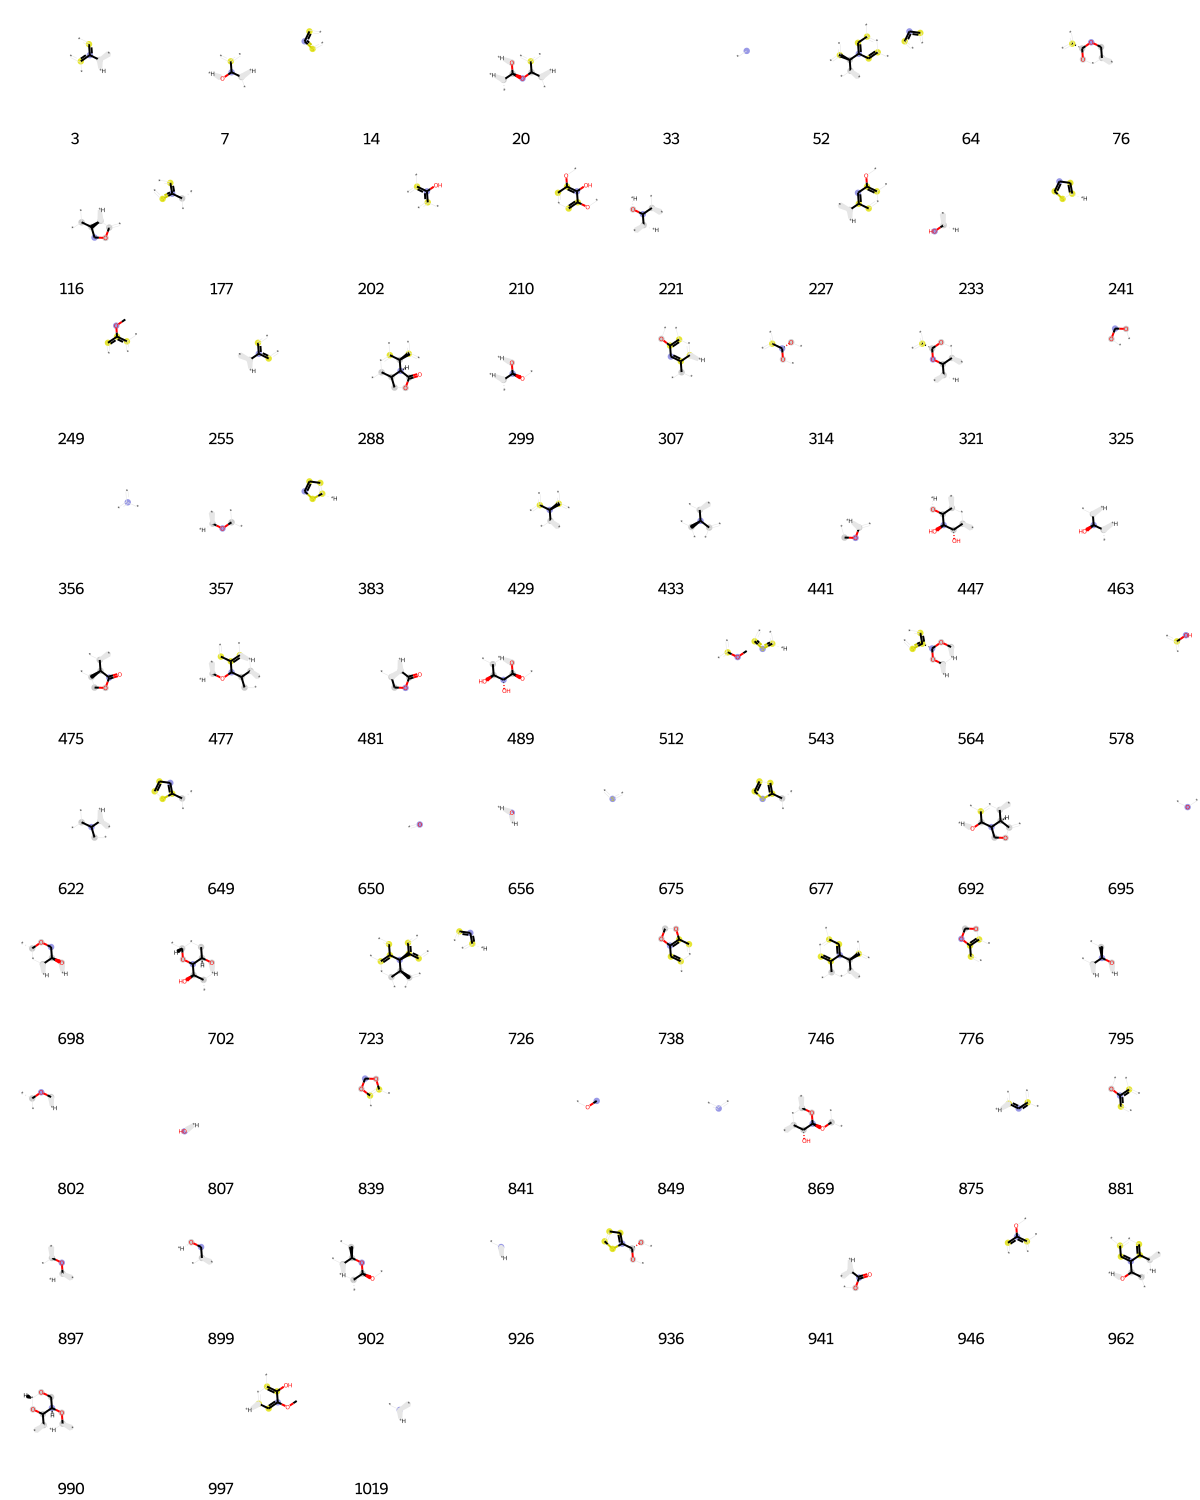

In [540]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [541]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[64,
 104,
 175,
 221,
 314,
 333,
 356,
 368,
 525,
 549,
 580,
 650,
 656,
 726,
 784,
 822,
 849,
 941]

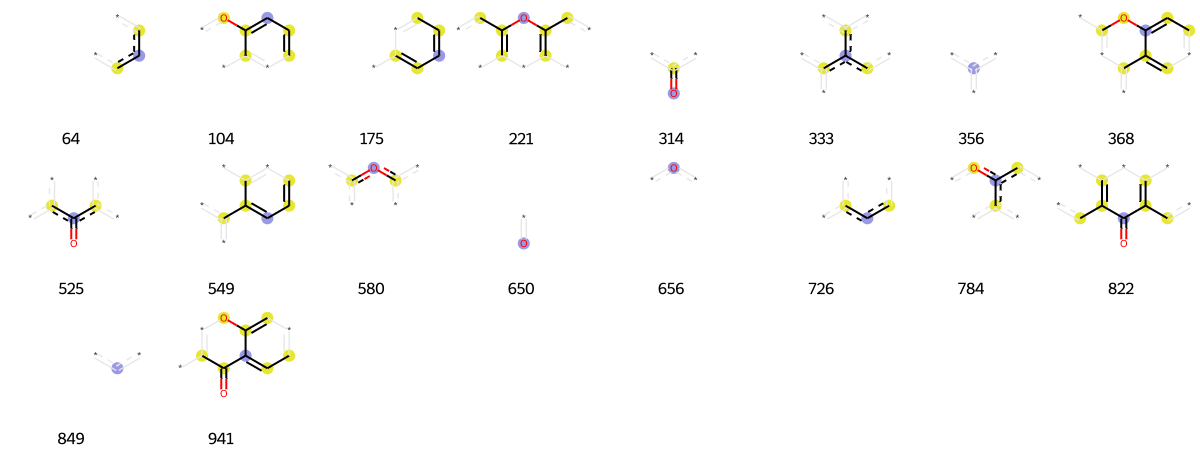

In [542]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [543]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 4,
 26,
 33,
 80,
 107,
 117,
 128,
 144,
 165,
 197,
 216,
 218,
 242,
 271,
 283,
 287,
 288,
 301,
 352,
 356,
 378,
 380,
 386,
 440,
 456,
 463,
 500,
 561,
 565,
 588,
 610,
 646,
 650,
 652,
 659,
 699,
 711,
 726,
 731,
 739,
 807,
 814,
 816,
 843,
 849,
 875,
 879,
 891,
 893,
 898,
 904,
 926,
 927,
 935,
 939,
 943,
 967,
 985,
 1008,
 1019]

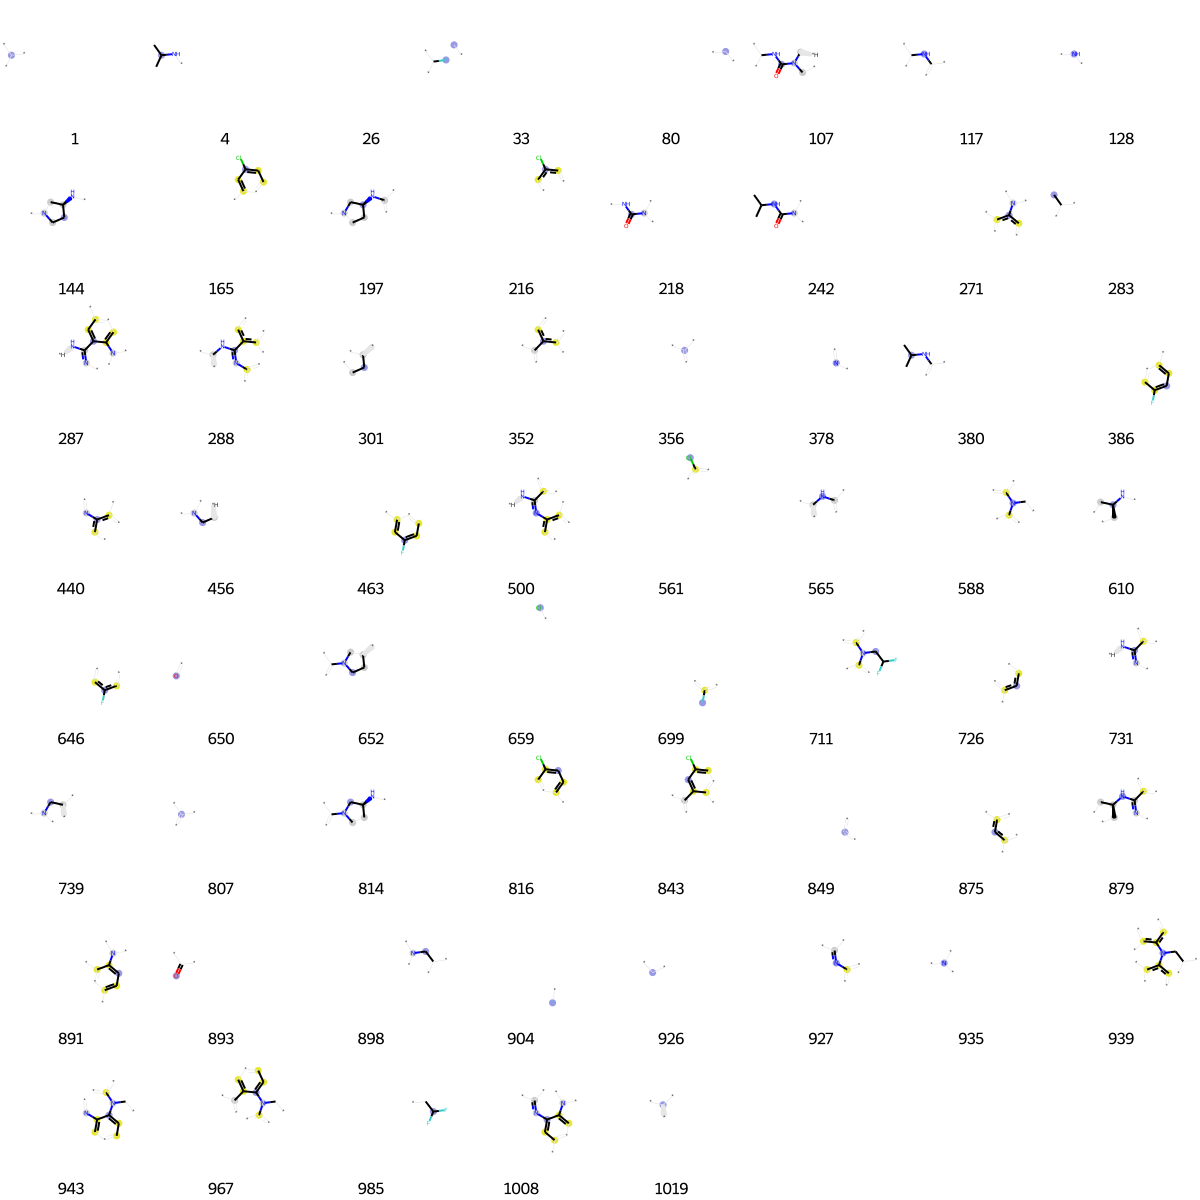

In [544]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [545]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[15,
 23,
 63,
 64,
 80,
 90,
 114,
 116,
 134,
 140,
 145,
 147,
 151,
 153,
 175,
 210,
 292,
 333,
 341,
 352,
 356,
 360,
 361,
 378,
 386,
 498,
 548,
 549,
 580,
 599,
 606,
 646,
 650,
 656,
 673,
 674,
 694,
 695,
 696,
 699,
 726,
 807,
 828,
 831,
 849,
 860,
 891,
 893,
 904,
 936,
 979,
 984,
 1000]

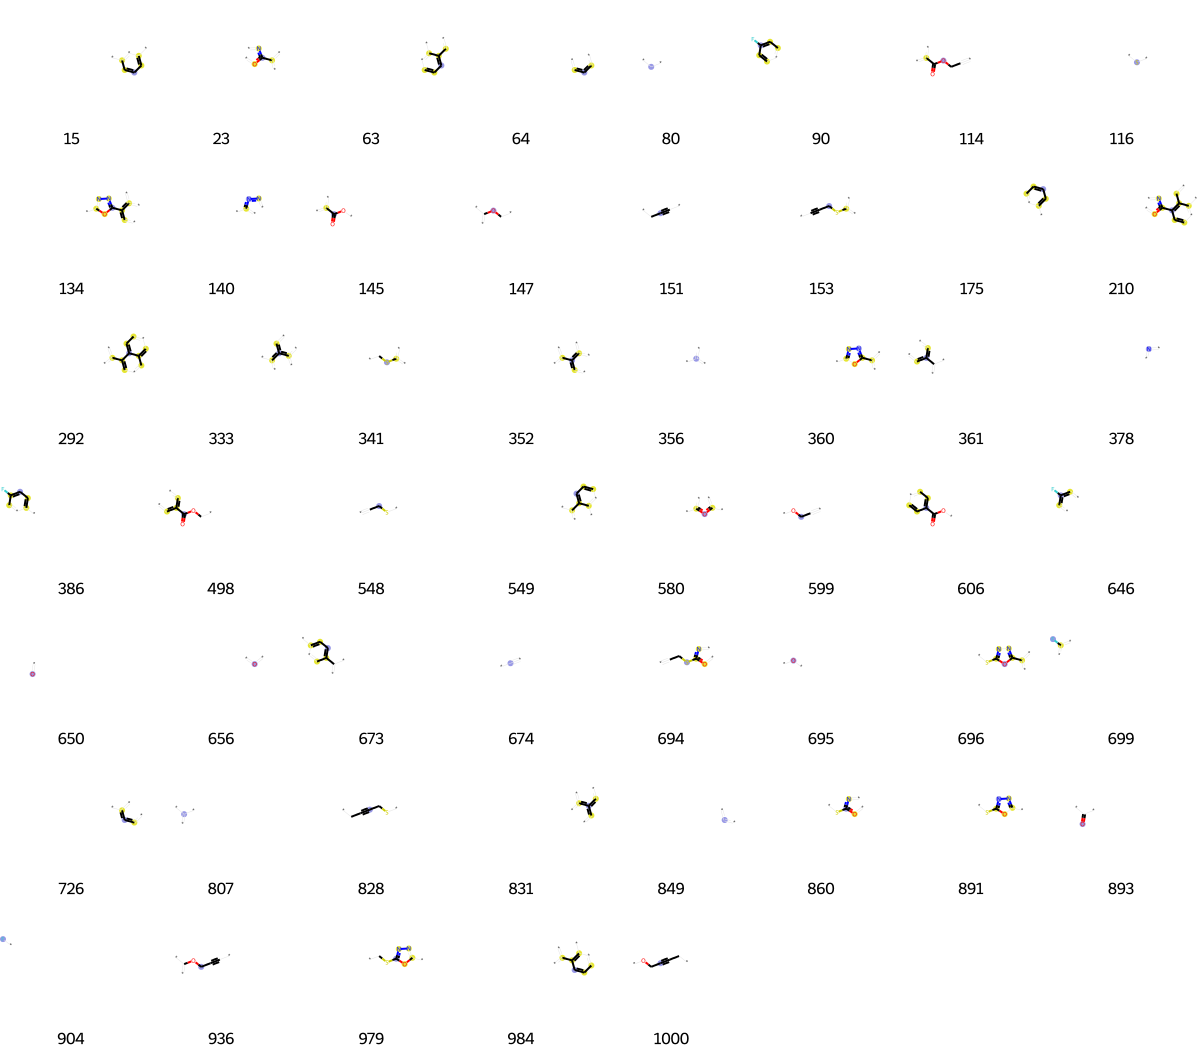

In [546]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [547]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 33,
 53,
 64,
 80,
 95,
 98,
 114,
 121,
 128,
 175,
 191,
 202,
 237,
 283,
 315,
 319,
 325,
 328,
 350,
 356,
 386,
 391,
 392,
 406,
 419,
 434,
 452,
 486,
 506,
 547,
 573,
 578,
 581,
 598,
 650,
 658,
 695,
 714,
 715,
 726,
 732,
 792,
 807,
 843,
 847,
 849,
 867,
 875,
 893,
 915,
 954,
 967,
 974,
 984,
 992]

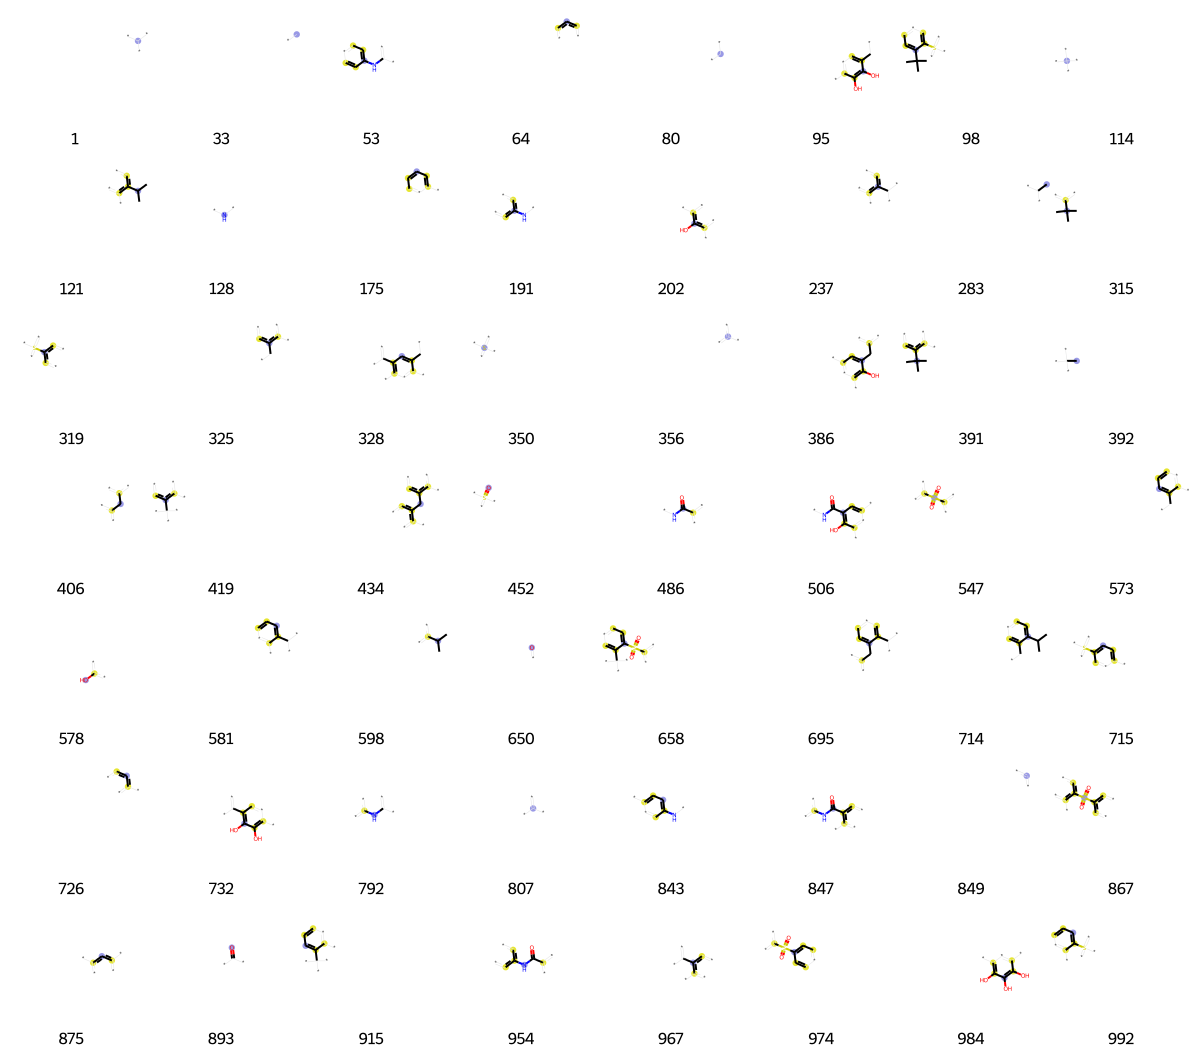

In [548]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [549]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[7,
 33,
 46,
 74,
 75,
 80,
 90,
 128,
 148,
 189,
 194,
 204,
 219,
 233,
 285,
 296,
 301,
 315,
 322,
 356,
 361,
 378,
 381,
 407,
 428,
 438,
 472,
 486,
 499,
 512,
 559,
 641,
 650,
 673,
 695,
 699,
 726,
 730,
 739,
 771,
 774,
 781,
 792,
 801,
 807,
 841,
 849,
 856,
 875,
 892,
 893,
 926,
 935,
 980,
 1019]

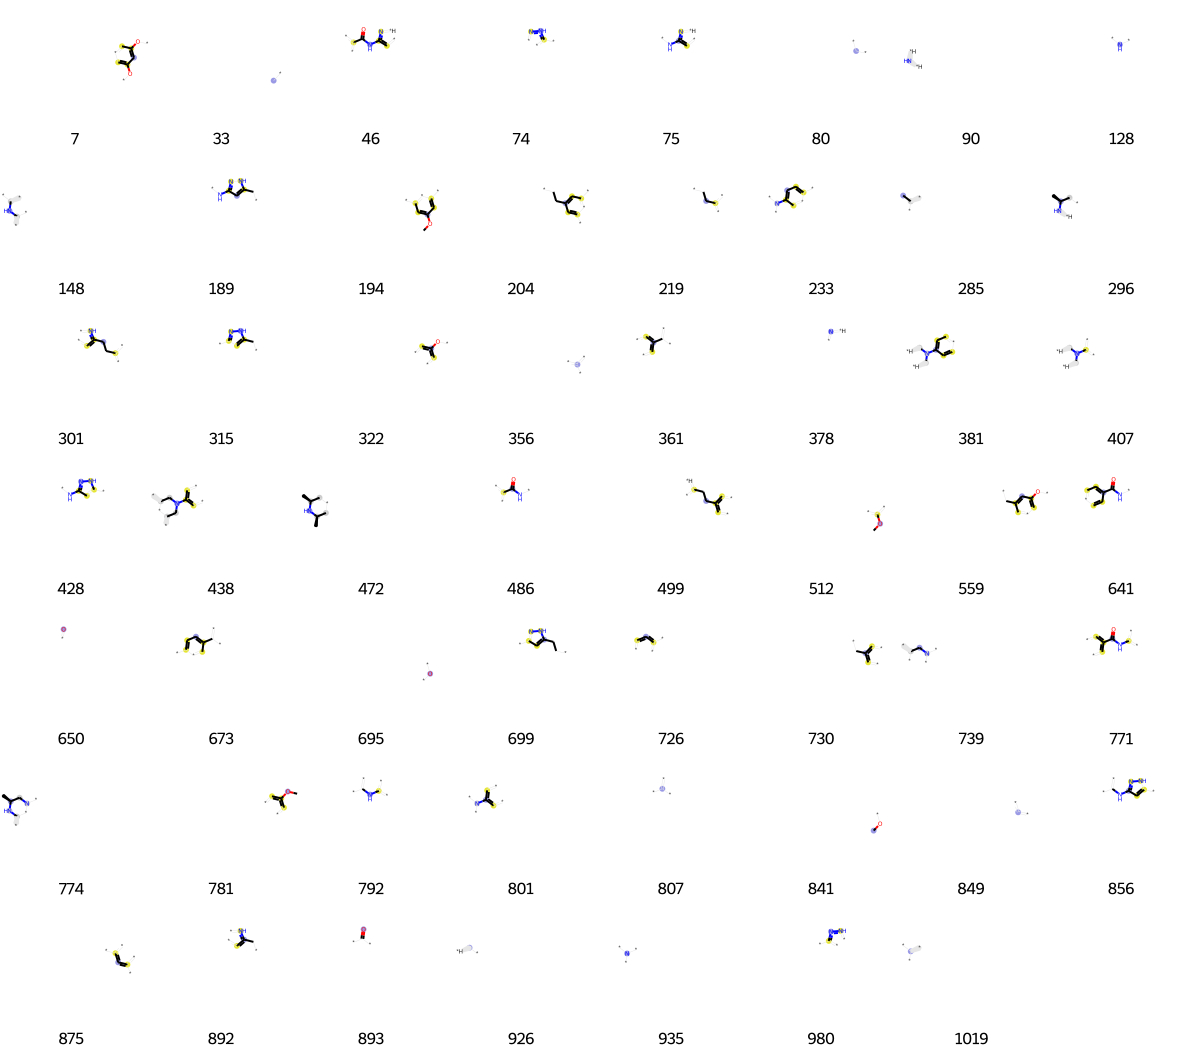

In [550]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [551]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 60,
 80,
 89,
 94,
 105,
 114,
 118,
 128,
 184,
 191,
 193,
 204,
 227,
 294,
 329,
 356,
 392,
 403,
 428,
 430,
 462,
 499,
 500,
 554,
 603,
 606,
 650,
 658,
 695,
 726,
 792,
 796,
 807,
 843,
 849,
 875,
 881,
 893,
 932,
 946,
 954,
 967,
 978,
 1008,
 1014,
 1017]

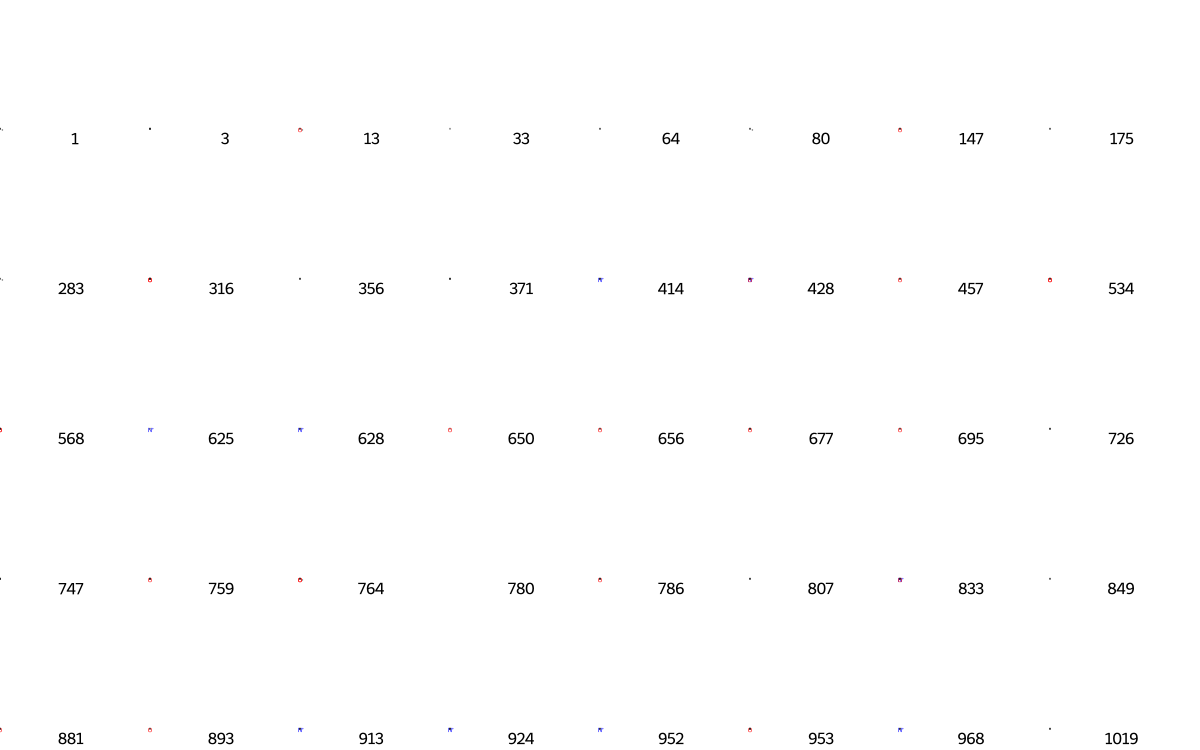

In [552]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [553]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 56,
 80,
 90,
 105,
 134,
 194,
 217,
 222,
 233,
 240,
 268,
 356,
 362,
 378,
 416,
 428,
 439,
 470,
 492,
 520,
 552,
 577,
 601,
 610,
 628,
 656,
 740,
 742,
 795,
 807,
 849,
 896,
 897,
 914,
 915,
 926,
 932,
 935,
 941,
 974,
 1019]

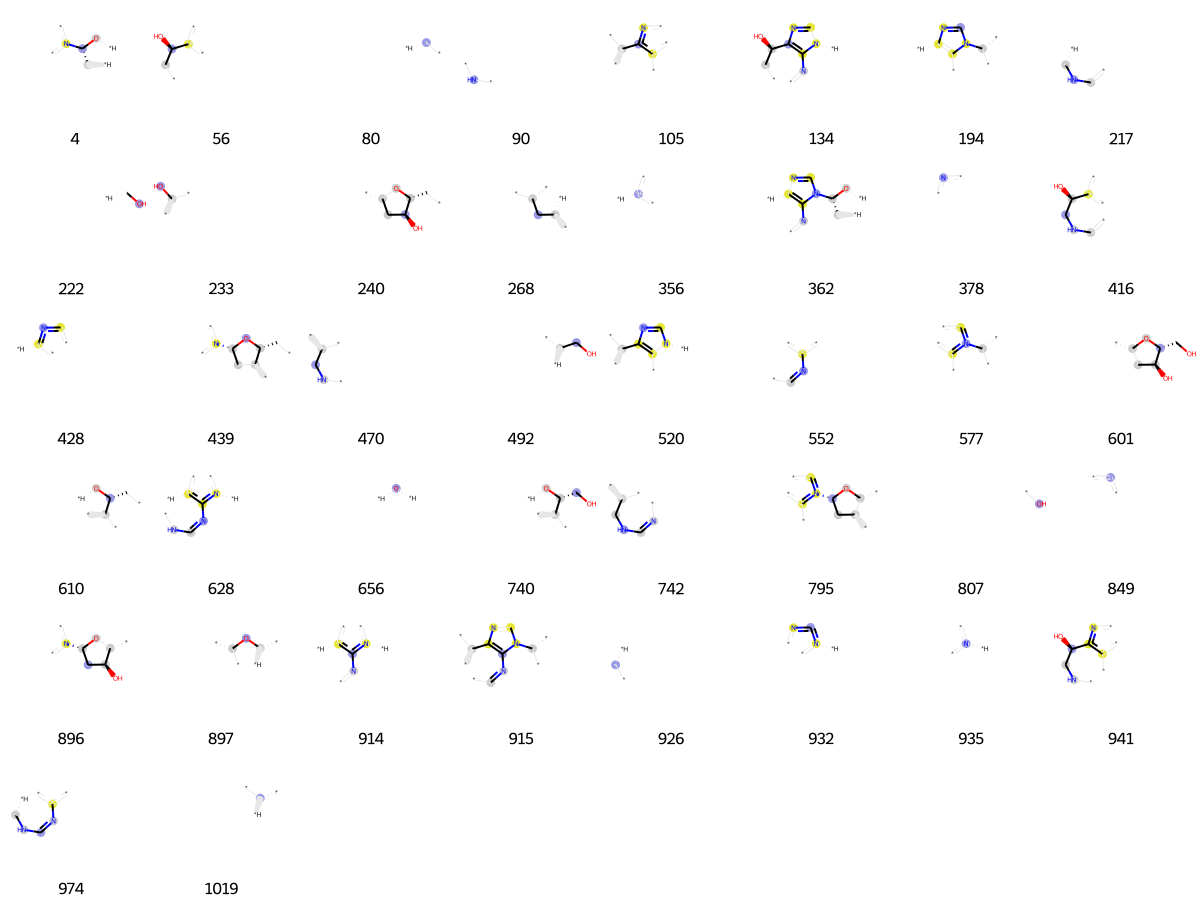

In [554]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [555]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[90,
 95,
 111,
 160,
 229,
 356,
 378,
 379,
 428,
 489,
 506,
 563,
 600,
 704,
 713,
 783,
 786,
 806,
 834,
 849,
 956,
 988]

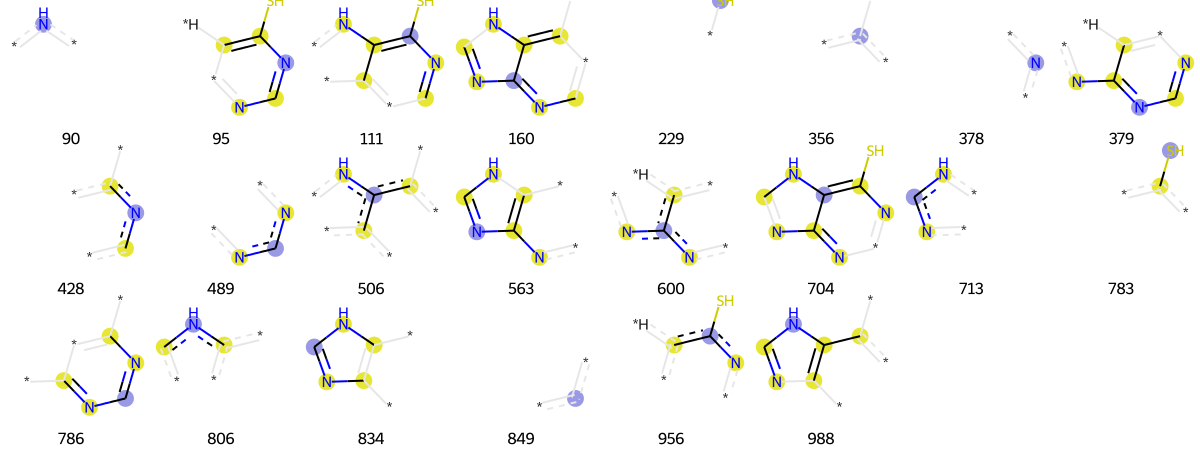

In [556]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [557]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 64,
 128,
 175,
 193,
 240,
 270,
 318,
 322,
 324,
 345,
 356,
 364,
 376,
 386,
 389,
 423,
 442,
 486,
 562,
 580,
 593,
 630,
 650,
 656,
 694,
 695,
 698,
 718,
 725,
 726,
 770,
 794,
 807,
 843,
 849,
 864,
 893,
 924,
 946,
 967,
 968]

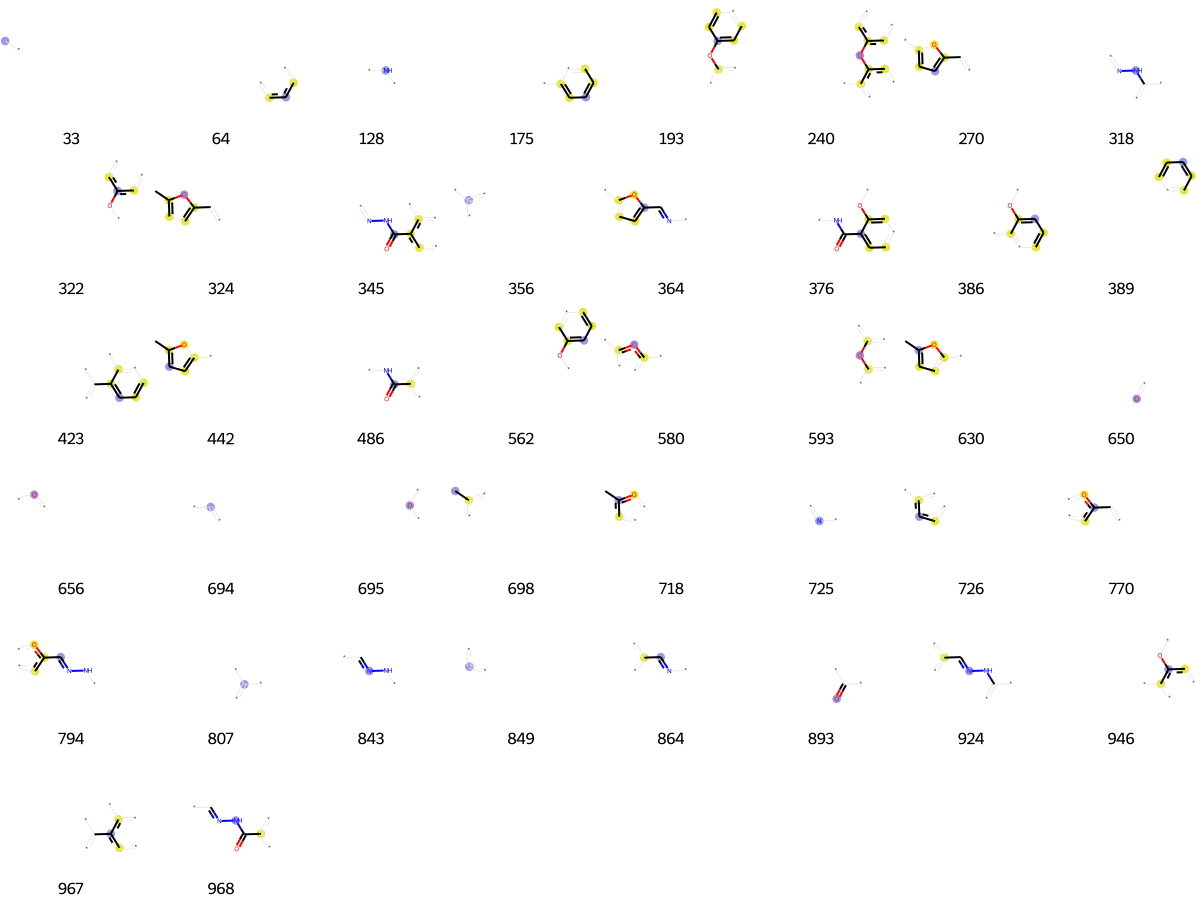

In [558]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [559]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 8,
 26,
 29,
 33,
 35,
 36,
 80,
 134,
 138,
 233,
 243,
 250,
 263,
 268,
 283,
 294,
 301,
 389,
 397,
 430,
 453,
 458,
 463,
 490,
 497,
 519,
 529,
 531,
 540,
 562,
 584,
 590,
 620,
 650,
 669,
 713,
 739,
 753,
 775,
 784,
 807,
 854,
 893,
 926,
 927,
 955,
 1015,
 1019]

In [560]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 46,
 77,
 80,
 84,
 116,
 165,
 185,
 216,
 237,
 243,
 258,
 310,
 349,
 356,
 366,
 378,
 439,
 494,
 548,
 561,
 579,
 591,
 623,
 630,
 659,
 667,
 686,
 726,
 730,
 762,
 805,
 816,
 842,
 843,
 849,
 875,
 898,
 925,
 932,
 935,
 998]

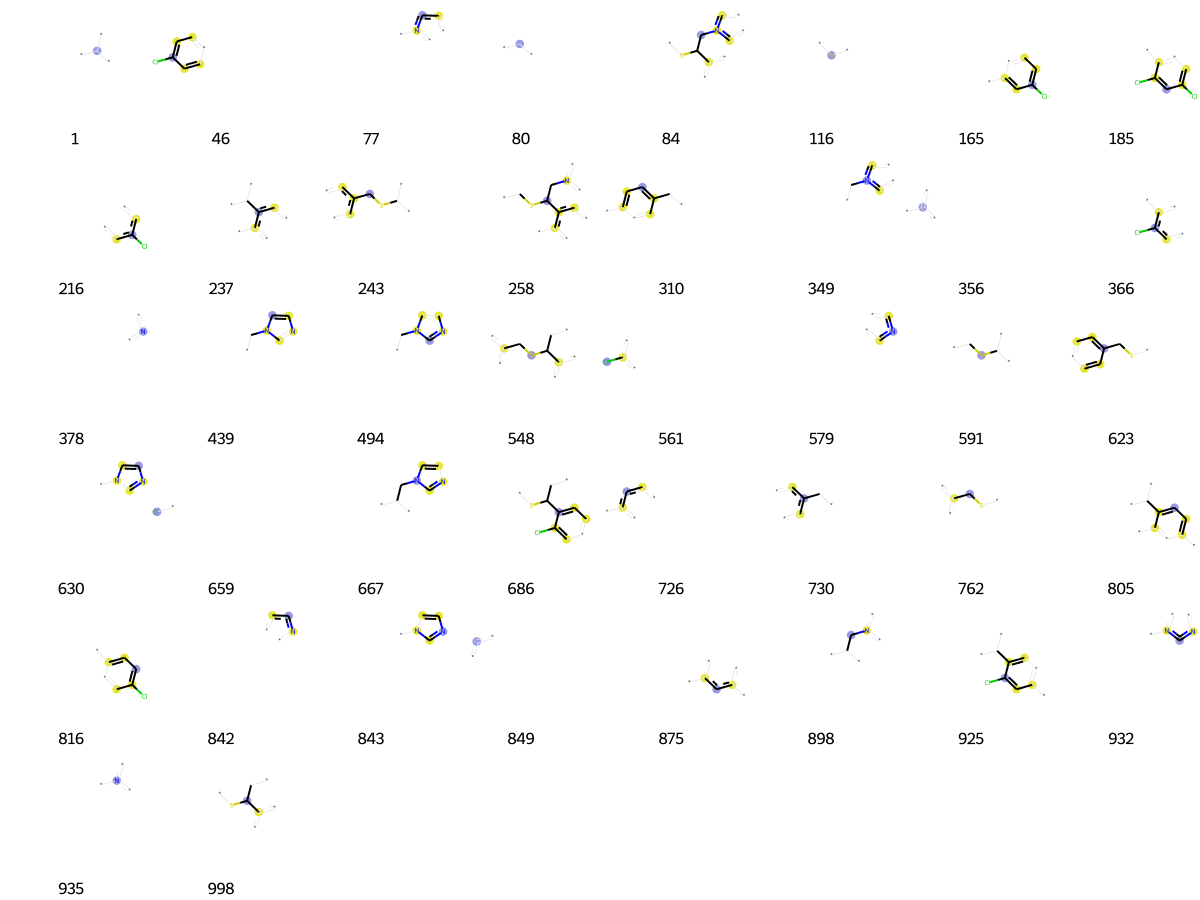

In [561]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [562]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[64,
 67,
 75,
 80,
 128,
 131,
 151,
 175,
 201,
 212,
 242,
 263,
 285,
 356,
 360,
 361,
 378,
 389,
 392,
 407,
 428,
 448,
 456,
 524,
 527,
 532,
 540,
 569,
 572,
 650,
 667,
 684,
 713,
 714,
 726,
 786,
 807,
 827,
 831,
 842,
 849,
 864,
 875,
 893,
 926,
 929,
 935,
 961,
 980,
 999]

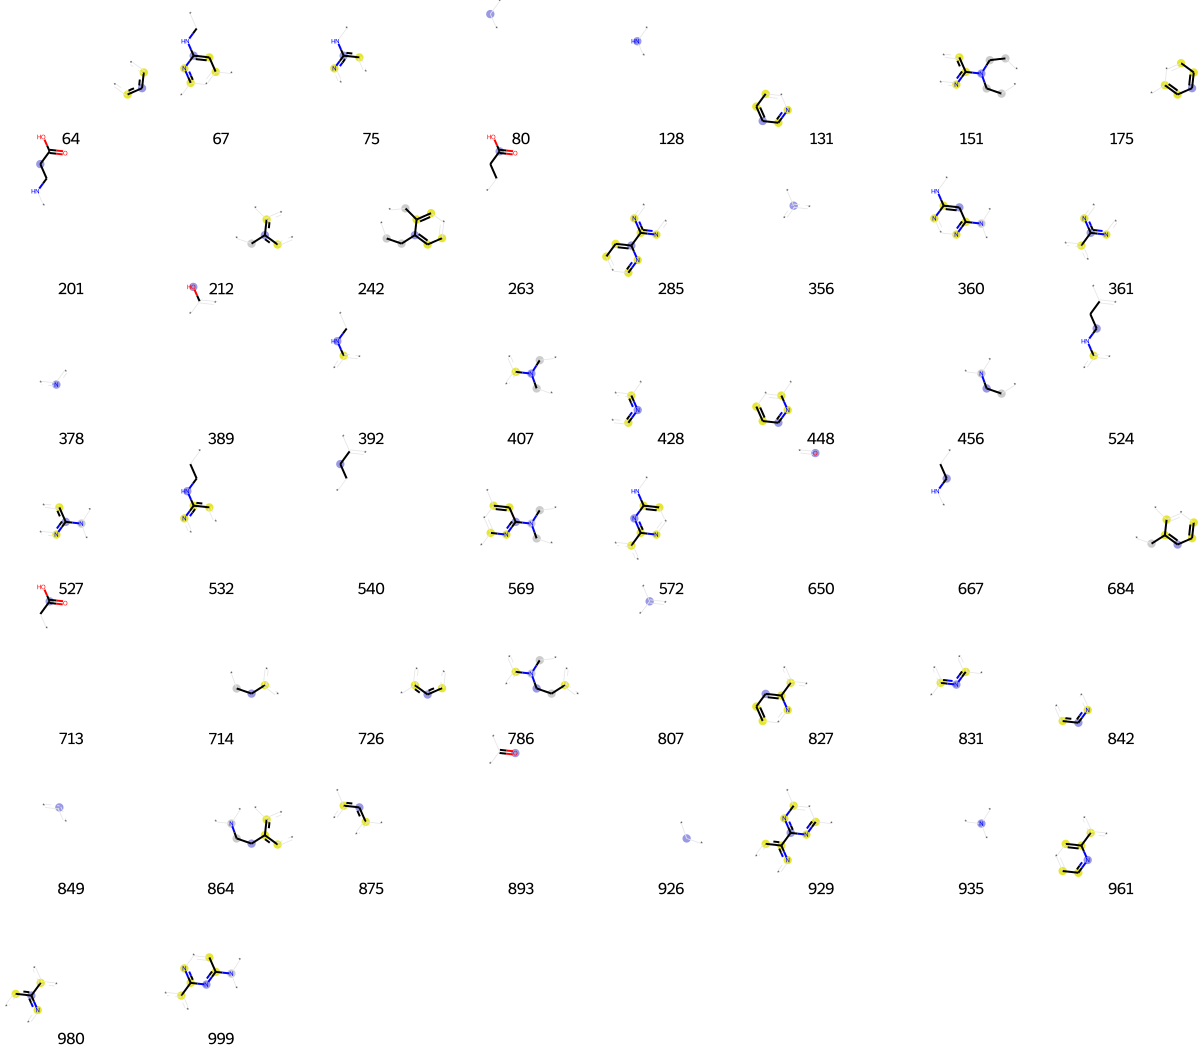

In [563]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [564]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 15,
 24,
 33,
 64,
 80,
 90,
 117,
 128,
 136,
 143,
 165,
 173,
 200,
 216,
 222,
 291,
 300,
 321,
 323,
 341,
 356,
 366,
 367,
 378,
 386,
 391,
 428,
 458,
 463,
 482,
 486,
 491,
 511,
 517,
 544,
 555,
 557,
 558,
 561,
 562,
 575,
 592,
 646,
 650,
 659,
 671,
 698,
 699,
 722,
 726,
 737,
 738,
 803,
 806,
 807,
 831,
 832,
 849,
 855,
 875,
 888,
 893,
 904,
 929,
 982,
 1003]

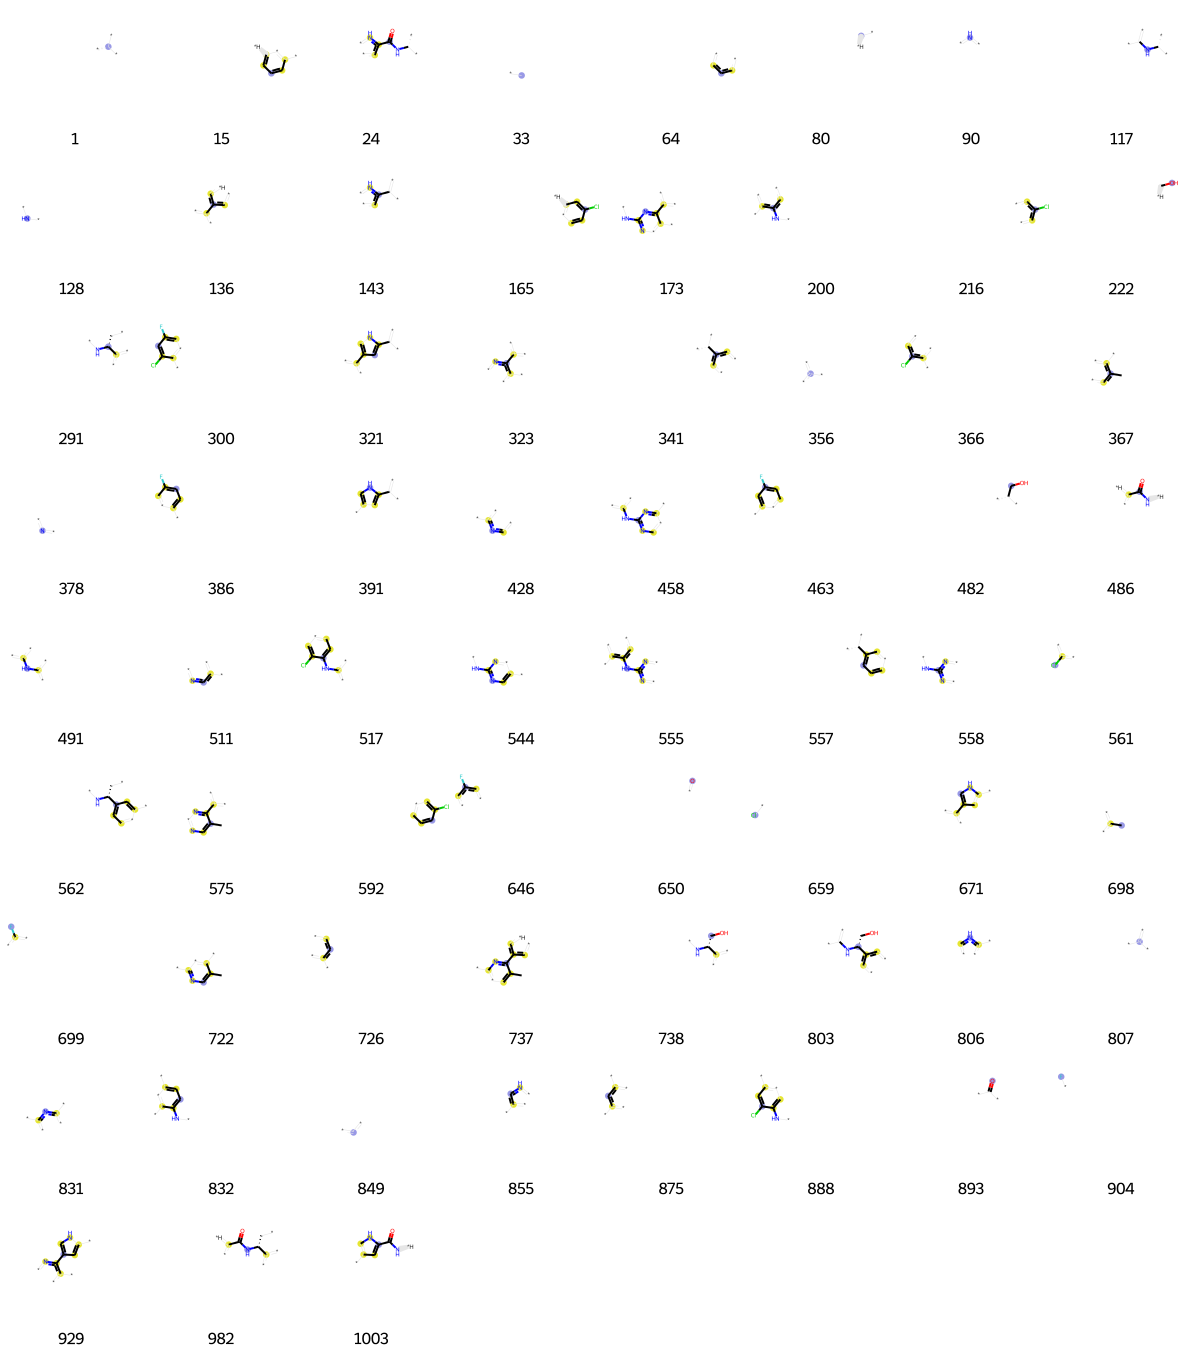

In [565]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [566]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 80,
 121,
 152,
 222,
 233,
 294,
 463,
 492,
 514,
 591,
 695,
 739,
 794,
 807,
 823,
 849,
 858,
 887,
 899,
 912,
 926,
 935,
 936,
 993,
 997,
 998,
 1012,
 1019]

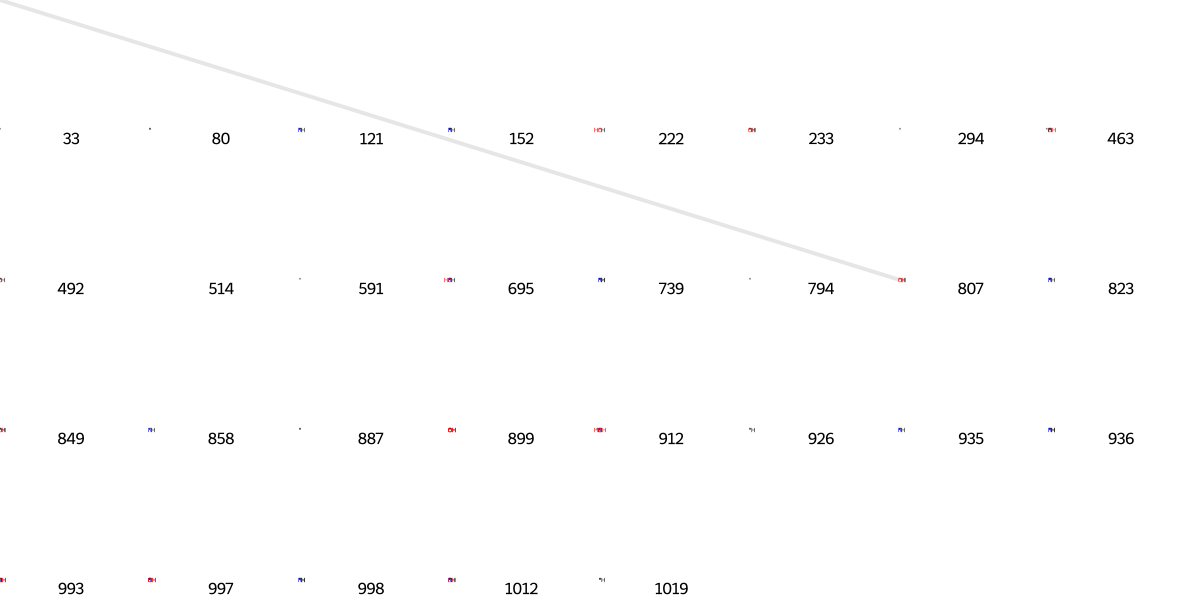

In [567]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [568]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 53,
 80,
 128,
 191,
 206,
 245,
 310,
 325,
 356,
 389,
 530,
 650,
 713,
 726,
 730,
 792,
 807,
 843,
 849,
 893,
 913,
 914,
 1017]

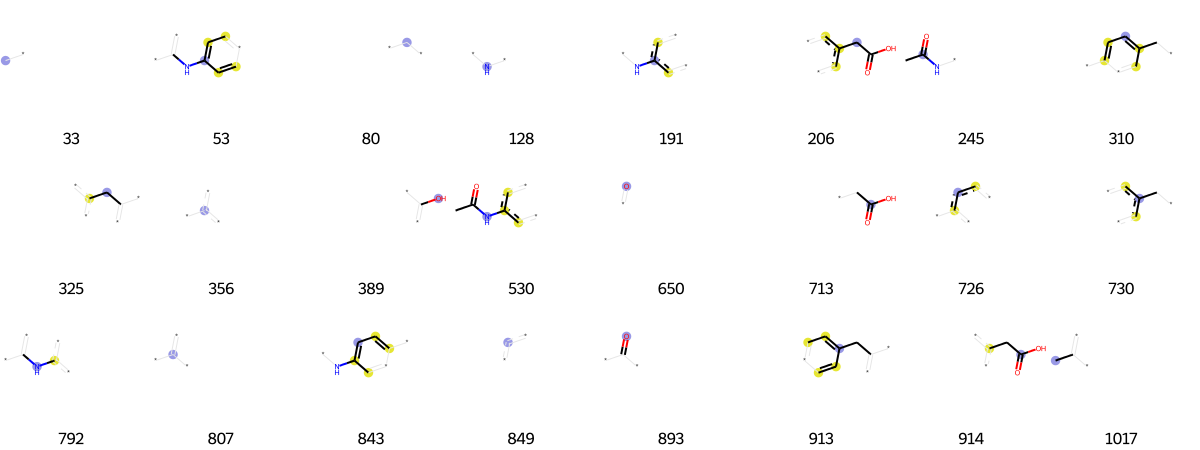

In [569]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [570]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[299, 551, 574, 656, 860, 994]

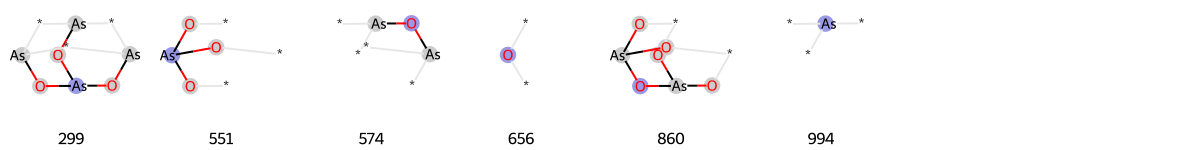

In [571]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [572]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 4,
 33,
 37,
 122,
 127,
 128,
 133,
 139,
 191,
 197,
 207,
 228,
 237,
 283,
 299,
 314,
 333,
 355,
 356,
 361,
 365,
 381,
 387,
 407,
 417,
 456,
 516,
 523,
 580,
 603,
 629,
 646,
 650,
 656,
 664,
 688,
 690,
 699,
 700,
 750,
 767,
 789,
 807,
 849,
 875,
 881,
 893,
 904,
 920,
 926,
 933,
 935,
 950,
 954,
 978,
 1014]

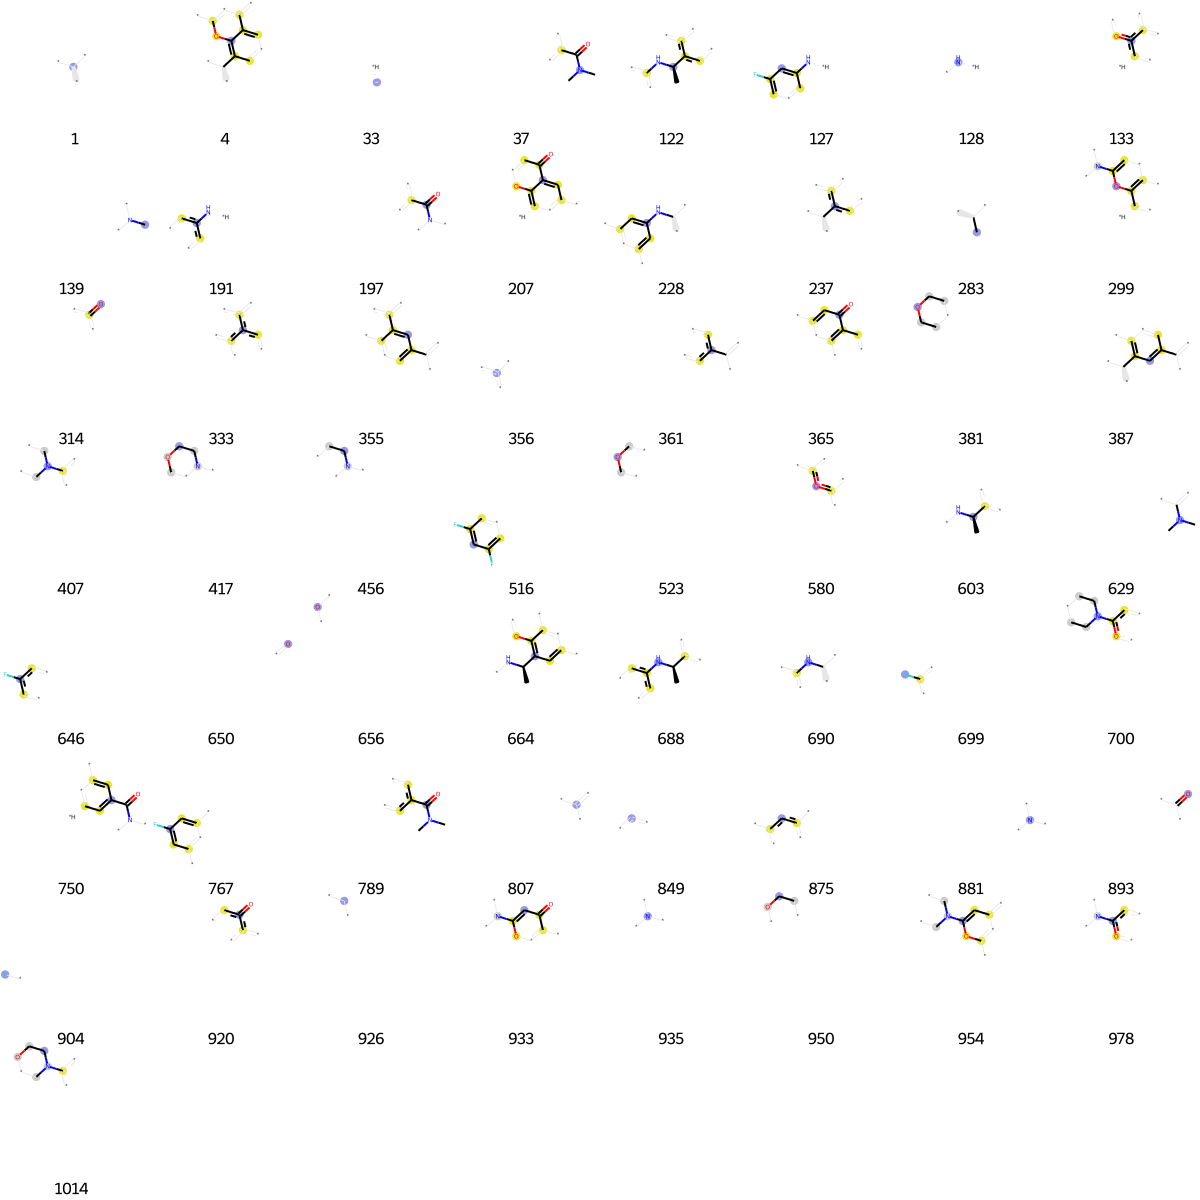

In [573]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])